# 라이브러리

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

In [8]:
from glob import glob
file_name = glob("서울시*.csv")
file_name

['서울시 우리마을가게 상권분석서비스(상권-상주인구).csv',
 '서울시 우리마을가게 상권분석서비스(상권-생활인구).csv',
 '서울시_우리마을가게_상권분석서비스(신_상권_점포)_2021년.csv',
 '서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv']

In [9]:
move_pop = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-생활인구).csv', encoding="cp949")
live_pop = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-상주인구).csv', encoding="cp949")
maechul = pd.read_csv('서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv', encoding="cp949")

# 생활인구 데이터
- 유동인구

In [10]:
move_pop = move_pop[move_pop["기준 년코드"]==2021]

In [11]:
move_pop = move_pop[['기준 년코드', '상권_코드', '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수',
                     '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', 
                     '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
                     '시간대_1_생활인구_수', '시간대_2_생활인구_수', '시간대_3_생활인구_수',
                     '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수',
                     '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', 
                     '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수']]

In [12]:
move_pop.columns = ['기준_년코드', '상권_코드', '총_생활인구_수', '남성_생활인구', '여성_생활인구', 
                    '10대_생활인구', '20대_생활인구', '30대_생활인구', '40대_생활인구', '50대_생활인구', '60대이상_생활인구',
                    '00~06시_생활인구', '06~11시_생활인구', '11~14시_생활인구', '14~17시_생활인구',
                    '17~21시_생활인구', '21~24시_생활인구', '월요일_생활인구', '화요일_생활인구', '수요일_생활인구', 
                    '목요일_생활인구', '금요일_생활인구', '토요일_생활인구', '일요일_생활인구']

# 상권코드 데이터

In [13]:
df_code = pd.read_csv('db431fa9896e1e12.csv',encoding="utf-8")

In [14]:
df_code = df_code.drop_duplicates()
df_code.tail(2)

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,행정동코드,행정동명,시군구명
130900,202112,U,관광특구,1001496,강남 마이스 관광특구,205310,445727,11680,11680580,11680580,삼성1동,강남구
130934,202112,U,관광특구,1001491,이태원 관광특구,199503,448326,11170,11170650,11170650,이태원1동,용산구


In [15]:
df_code = df_code.drop(columns=['기준_년월_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명',
                                '엑스좌표_값', '와이좌표_값', '시군구_코드', '행정동코드'])

# merge
- 생활인구 데이터와 상권코드 데이터 merge

In [16]:
move_pop_m = pd.merge(move_pop, df_code, on=['상권_코드'], how='left')
move_pop_m = move_pop_m.drop_duplicates()
print(move_pop_m.shape)
move_pop_m.tail(2)

(6672, 27)


,기준_년코드,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,20대_생활인구,30대_생활인구,40대_생활인구,50대_생활인구,...,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드,행정동명,시군구명
6670,2021,2110002,289007,132955,156052,50153,37820,34412,43016,43583,...,42010,41989,41940,41554,41759,40176,39581,11110570,무악동,종로구
6671,2021,2110001,188663,87315,101347,33841,20623,18474,30157,32870,...,26475,26377,26398,26644,26237,28005,28528,11110560,평창동,종로구


In [17]:
move_pop_m = move_pop_m.groupby(["기준_년코드","시군구명","행정동명"]).sum()
move_pop_m = move_pop_m.reset_index()
print(move_pop_m.shape)
move_pop_m.head(2)

(402, 27)


,기준_년코드,시군구명,행정동명,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,20대_생활인구,30대_생활인구,...,17~21시_생활인구,21~24시_생활인구,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드
0,2021,강남구,개포1동,8443972,137388,64092,73298,26412,12785,23001,...,20040,17631,20395,19157,19288,19856,19667,20154,18868,46722640
1,2021,강남구,개포2동,16965216,2726991,1290584,1436407,551533,279701,337752,...,443625,296194,391782,396697,396070,398946,394407,384518,364572,93445360


# 시군구명, 행정동 random.choice 세팅
- streamlit 대시보드 메뉴에서 특정 구 또는 동을 골랐을 경우를 위해서

In [19]:
시군구 = np.random.choice(move_pop_m["시군구명"].unique())
시군구

'강동구'

In [21]:
행정동 = np.random.choice(move_pop_m.loc[move_pop_m["시군구명"]==시군구, "행정동명"].unique())
행정동

'천호1동'

In [24]:
df_gu = move_pop_m[(move_pop_m["시군구명"]==시군구)]
print(df_gu.shape)
df_gu.head(2)

(16, 27)


,기준_년코드,시군구명,행정동명,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,20대_생활인구,30대_생활인구,...,17~21시_생활인구,21~24시_생활인구,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드
20,2021,강동구,강일동,8444360,263783,129719,134065,53681,25666,43400,...,44489,35436,37878,37948,37612,37639,37956,37445,37309,46962060
21,2021,강동구,고덕1동,8444340,3426852,1688426,1738426,776980,353294,398068,...,568317,454613,485036,484383,484151,483083,479272,502661,508275,46962200


In [25]:
df_dong = move_pop_m[(move_pop_m["시군구명"]==시군구) & (move_pop_m["행정동명"]==행정동)]

# move_pop_m 기준 Tidy dataset
- move_pop_m : 생활인구데이터와 상권코드 데이터를 merge한 데이터

In [28]:
df_sex = pd.melt(move_pop_m, id_vars=["시군구명", '행정동명', '총_생활인구_수'], 
                 value_vars=['남성_생활인구'], var_name="성별별", value_name="성별별인구")
df_sex

,시군구명,행정동명,총_생활인구_수,성별별,성별별인구
0,강남구,개포1동,137388,남성_생활인구,64092
1,강남구,개포2동,2726991,남성_생활인구,1290584
2,강남구,개포4동,10293594,남성_생활인구,4953065
3,강남구,논현1동,44557563,남성_생활인구,21989188
4,강남구,논현2동,34162556,남성_생활인구,17099361
...,...,...,...,...,...
397,중랑구,상봉2동,22590916,남성_생활인구,10492678
398,중랑구,신내1동,7847030,남성_생활인구,3577835
399,중랑구,신내2동,226566,남성_생활인구,101035
400,중랑구,중화1동,10808859,남성_생활인구,5023805


In [30]:
df_age = pd.melt(move_pop_m, id_vars=["시군구명", '행정동명', '총_생활인구_수'], 
                 value_vars=['10대_생활인구', '20대_생활인구', '30대_생활인구', '40대_생활인구', '50대_생활인구', '60대이상_생활인구'],
                 var_name="연령별", value_name="연령별인구")
df_age

,시군구명,행정동명,총_생활인구_수,연령별,연령별인구
0,강남구,개포1동,137388,10대_생활인구,26412
1,강남구,개포2동,2726991,10대_생활인구,551533
2,강남구,개포4동,10293594,10대_생활인구,1789097
3,강남구,논현1동,44557563,10대_생활인구,2989242
4,강남구,논현2동,34162556,10대_생활인구,3050743
...,...,...,...,...,...
2407,중랑구,상봉2동,22590916,60대이상_생활인구,5082381
2408,중랑구,신내1동,7847030,60대이상_생활인구,2075067
2409,중랑구,신내2동,226566,60대이상_생활인구,58145
2410,중랑구,중화1동,10808859,60대이상_생활인구,2781684


In [32]:
df_time = pd.melt(move_pop_m, id_vars=["시군구명", '행정동명', '총_생활인구_수'],
                  value_vars=['00~06시_생활인구', '06~11시_생활인구', '11~14시_생활인구',
                              '14~17시_생활인구', '17~21시_생활인구', '21~24시_생활인구'],
                  var_name="시간대별", value_name="시간대별인구")

In [33]:
df_week = pd.melt(move_pop_m, id_vars=["시군구명", '행정동명'], value_vars=['월요일_생활인구', '화요일_생활인구', 
                '수요일_생활인구', '목요일_생활인구', '금요일_생활인구', '토요일_생활인구', '일요일_생활인구'],
                  var_name="요일별", value_name="요일별인구")
df_week

,시군구명,행정동명,요일별,요일별인구
0,강남구,개포1동,월요일_생활인구,20395
1,강남구,개포2동,월요일_생활인구,391782
2,강남구,개포4동,월요일_생활인구,1494022
3,강남구,논현1동,월요일_생활인구,6612762
4,강남구,논현2동,월요일_생활인구,5161328
...,...,...,...,...
2809,중랑구,상봉2동,일요일_생활인구,3301681
2810,중랑구,신내1동,일요일_생활인구,1187147
2811,중랑구,신내2동,일요일_생활인구,31750
2812,중랑구,중화1동,일요일_생활인구,1572949


# random.choice 구 기준 Tidy dataset

In [37]:
df_gu_sex = pd.melt(df_gu, id_vars=["시군구명", '행정동명', '총_생활인구_수'], value_vars=['남성_생활인구', '여성_생활인구'], 
                    var_name="성별별", value_name="성별별인구")
df_gu_sex.sample(5)

,시군구명,행정동명,총_생활인구_수,성별별,성별별인구
27,강동구,암사1동,23279578,여성_생활인구,12419079
0,강동구,강일동,263783,남성_생활인구,129719
29,강동구,천호1동,37730521,여성_생활인구,20193293
9,강동구,성내2동,31263952,남성_생활인구,14697518
16,강동구,강일동,263783,여성_생활인구,134065


In [38]:
df_gu_age = pd.melt(df_gu, id_vars=["시군구명", '행정동명'], value_vars=['10대_생활인구', '20대_생활인구', '30대_생활인구', 
                    '40대_생활인구', '50대_생활인구', '60대이상_생활인구'], var_name="연령별", value_name="연령별인구")
df_gu_age.sample(5)

,시군구명,행정동명,연령별,연령별인구
19,강동구,길동,20대_생활인구,6331603
33,강동구,고덕1동,30대_생활인구,398068
55,강동구,상일동,40대_생활인구,642782
20,강동구,둔촌2동,20대_생활인구,2162549
91,강동구,암사1동,60대이상_생활인구,5632002


In [39]:
df_gu_time = pd.melt(df_gu, id_vars=["시군구명", '행정동명'], value_vars=['00~06시_생활인구', '06~11시_생활인구', '11~14시_생활인구',
                    '14~17시_생활인구', '17~21시_생활인구', '21~24시_생활인구'],
                     var_name="시간대별", value_name="시간대별인구")
df_gu_time.sample(5)

,시군구명,행정동명,시간대별,시간대별인구
81,강동구,고덕1동,21~24시_생활인구,454613
85,강동구,명일1동,21~24시_생활인구,1306797
59,강동구,암사1동,14~17시_생활인구,2457194
61,강동구,천호1동,14~17시_생활인구,3889374
7,강동구,상일동,00~06시_생활인구,991099


In [40]:
df_gu_week = pd.melt(df_gu, id_vars=["시군구명", '행정동명'], value_vars=['월요일_생활인구', '화요일_생활인구', '수요일_생활인구', 
                    '목요일_생활인구', '금요일_생활인구', '토요일_생활인구', '일요일_생활인구'],
                     var_name="요일별", value_name="요일별인구")
df_gu_week.sample(5)

,시군구명,행정동명,요일별,요일별인구
13,강동구,천호1동,월요일_생활인구,5367462
64,강동구,강일동,금요일_생활인구,37956
65,강동구,고덕1동,금요일_생활인구,479272
88,강동구,성내1동,토요일_생활인구,2275116
12,강동구,암사2동,월요일_생활인구,544189


# random.choice 행정동 기준 Tidy dataset

In [41]:
df_dong_sex = pd.melt(df_gu, id_vars=["시군구명", '행정동명', '총_생활인구_수'], value_vars=['남성_생활인구', '여성_생활인구'], 
                    var_name="성별별", value_name="성별별인구")
df_dong_sex.sample(5)

,시군구명,행정동명,총_생활인구_수,성별별,성별별인구
9,강동구,성내2동,31263952,남성_생활인구,14697518
1,강동구,고덕1동,3426852,남성_생활인구,1688426
27,강동구,암사1동,23279578,여성_생활인구,12419079
29,강동구,천호1동,37730521,여성_생활인구,20193293
26,강동구,성내3동,27627537,여성_생활인구,14110508


In [42]:
df_dong_age = pd.melt(df_gu, id_vars=["시군구명", '행정동명'], value_vars=['10대_생활인구', '20대_생활인구', '30대_생활인구', 
                    '40대_생활인구', '50대_생활인구', '60대이상_생활인구'], var_name="연령별", value_name="연령별인구")
df_dong_age.sample(5)

,시군구명,행정동명,연령별,연령별인구
32,강동구,강일동,30대_생활인구,43400
72,강동구,성내1동,50대_생활인구,2571897
88,강동구,성내1동,60대이상_생활인구,3770147
22,강동구,명일2동,20대_생활인구,345311
74,강동구,성내3동,50대_생활인구,4486845


In [43]:
df_dong_time = pd.melt(df_gu, id_vars=["시군구명", '행정동명'], value_vars=['00~06시_생활인구', '06~11시_생활인구', '11~14시_생활인구',
                    '14~17시_생활인구', '17~21시_생활인구', '21~24시_생활인구'],
                     var_name="시간대별", value_name="시간대별인구")
df_dong_time.sample(5)

,시군구명,행정동명,시간대별,시간대별인구
55,강동구,상일동,14~17시_생활인구,427527
7,강동구,상일동,00~06시_생활인구,991099
87,강동구,상일동,21~24시_생활인구,478425
41,강동구,성내2동,11~14시_생활인구,3470624
61,강동구,천호1동,14~17시_생활인구,3889374


In [44]:
df_dong_week = pd.melt(df_gu, id_vars=["시군구명", '행정동명'], value_vars=['월요일_생활인구', '화요일_생활인구', '수요일_생활인구', 
                    '목요일_생활인구', '금요일_생활인구', '토요일_생활인구', '일요일_생활인구'],
                     var_name="요일별", value_name="요일별인구")
df_dong_week.sample(5)

,시군구명,행정동명,요일별,요일별인구
71,강동구,상일동,금요일_생활인구,541341
102,강동구,명일2동,일요일_생활인구,431624
83,강동구,길동,토요일_생활인구,7167201
22,강동구,명일2동,화요일_생활인구,473429
4,강동구,둔촌2동,월요일_생활인구,2561011


# 시각화

In [45]:
# 유동인구가 가장 많은 상위5개
move_pop_m.sort_values(by=["총_생활인구_수"], ascending=False).head(5)

,기준_년코드,시군구명,행정동명,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,20대_생활인구,30대_생활인구,...,17~21시_생활인구,21~24시_생활인구,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드
193,2021,마포구,서교동,118658124,64345677,29530287,34815382,6212262,19704022,14020070,...,13815142,7354820,8959565,9050591,9199201,9232178,9417558,9603205,8883369,640676960
61,2021,강서구,화곡1동,59252260,62821237,29242857,33578381,7230347,10492149,12501729,...,10562218,8420753,8877402,8770883,8788932,8779274,8816277,9286845,9501627,322015120
16,2021,강남구,역삼1동,118512924,54724035,28511886,26212144,3674197,11808910,15168893,...,9540735,5258890,8454359,8775945,8665973,8753157,8388746,6078352,5607508,654115840
23,2021,강동구,길동,67668124,49060810,22518053,26542746,7533041,6331603,7485120,...,8008300,6363622,6959667,6929424,6934211,6922101,6943967,7167201,7204233,375701920
11,2021,강남구,삼성2동,59255148,48283925,24668553,23615363,5331617,8513610,11866290,...,8537457,4601249,7400315,7692505,7599891,7702320,7407661,5454426,5026802,327056520


## 시군구명 df_gu

### 구 - 행정동별 총생활인구

In [46]:
df_gu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 20 to 35
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년코드       16 non-null     int64 
 1   시군구명         16 non-null     object
 2   행정동명         16 non-null     object
 3   상권_코드        16 non-null     int64 
 4   총_생활인구_수     16 non-null     int64 
 5   남성_생활인구      16 non-null     int64 
 6   여성_생활인구      16 non-null     int64 
 7   10대_생활인구     16 non-null     int64 
 8   20대_생활인구     16 non-null     int64 
 9   30대_생활인구     16 non-null     int64 
 10  40대_생활인구     16 non-null     int64 
 11  50대_생활인구     16 non-null     int64 
 12  60대이상_생활인구   16 non-null     int64 
 13  00~06시_생활인구  16 non-null     int64 
 14  06~11시_생활인구  16 non-null     int64 
 15  11~14시_생활인구  16 non-null     int64 
 16  14~17시_생활인구  16 non-null     int64 
 17  17~21시_생활인구  16 non-null     int64 
 18  21~24시_생활인구  16 non-null     int64 
 19  월요일_생활인구     16 non-null     i

In [47]:
df_gu.pivot_table(index="행정동명", values='총_생활인구_수', aggfunc=sum)

,총_생활인구_수
행정동명,
강일동,263783
고덕1동,3426852
고덕2동,3672441
길동,49060810
둔촌2동,17847933
명일1동,9988004
명일2동,3281425
상일동,3757975
성내1동,16999957


<AxesSubplot:xlabel='행정동명', ylabel='총_생활인구_수'>

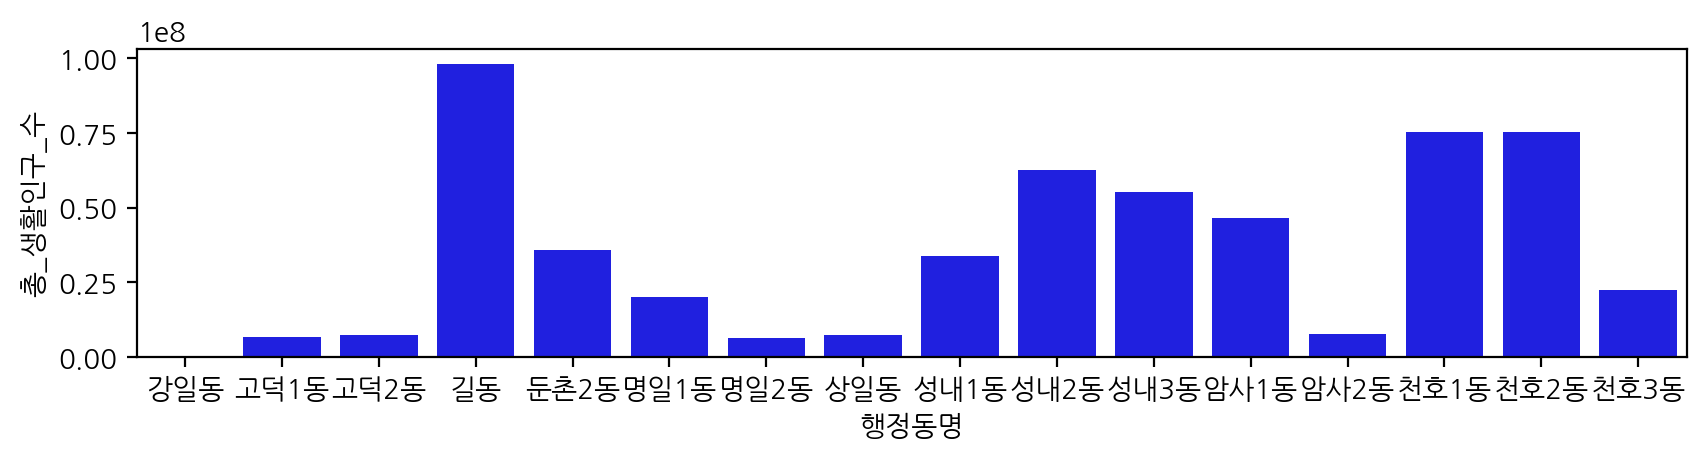

In [50]:
plt.figure(figsize=(10,2))
sns.barplot(data=df_gu_sex, x="행정동명", y="총_생활인구_수", estimator=sum, ci=None, color="blue")

### 구- 행정동별 성별 인구

<AxesSubplot:xlabel='행정동명', ylabel='성별별인구'>

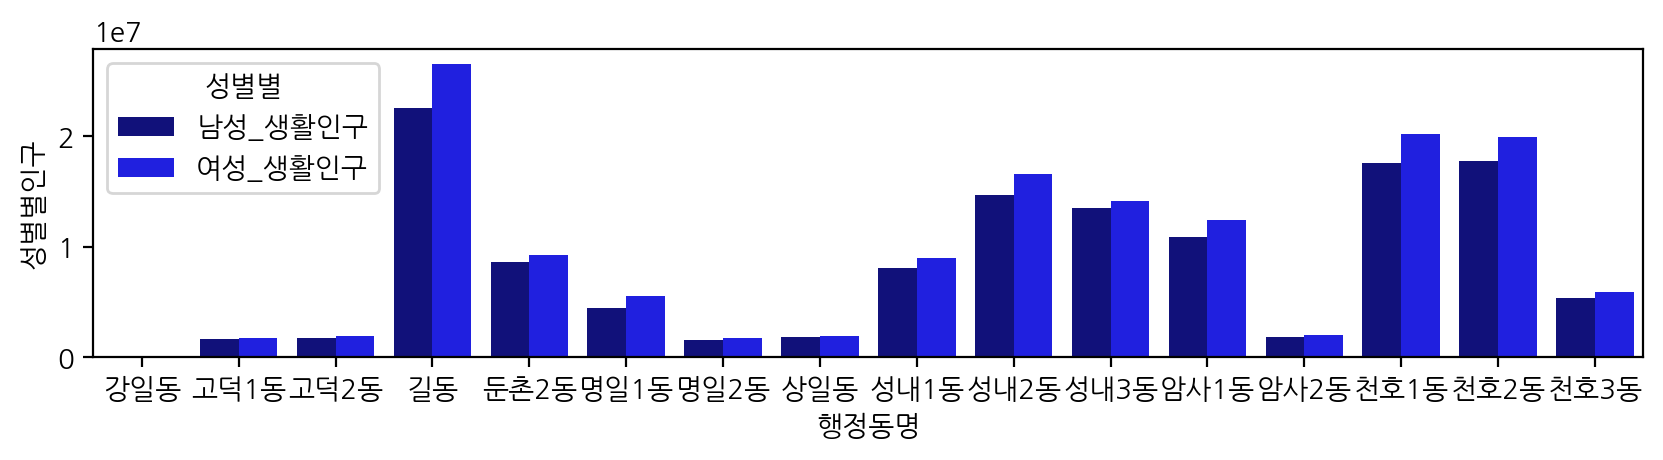

In [60]:
plt.figure(figsize=(10,2))
sns.barplot(data=df_gu_sex, x="행정동명", y="성별별인구", hue="성별별", estimator=sum, 
            ci=None, palette={"남성_생활인구":"darkblue", "여성_생활인구":"blue"})

### 구- 행정동별 연령대

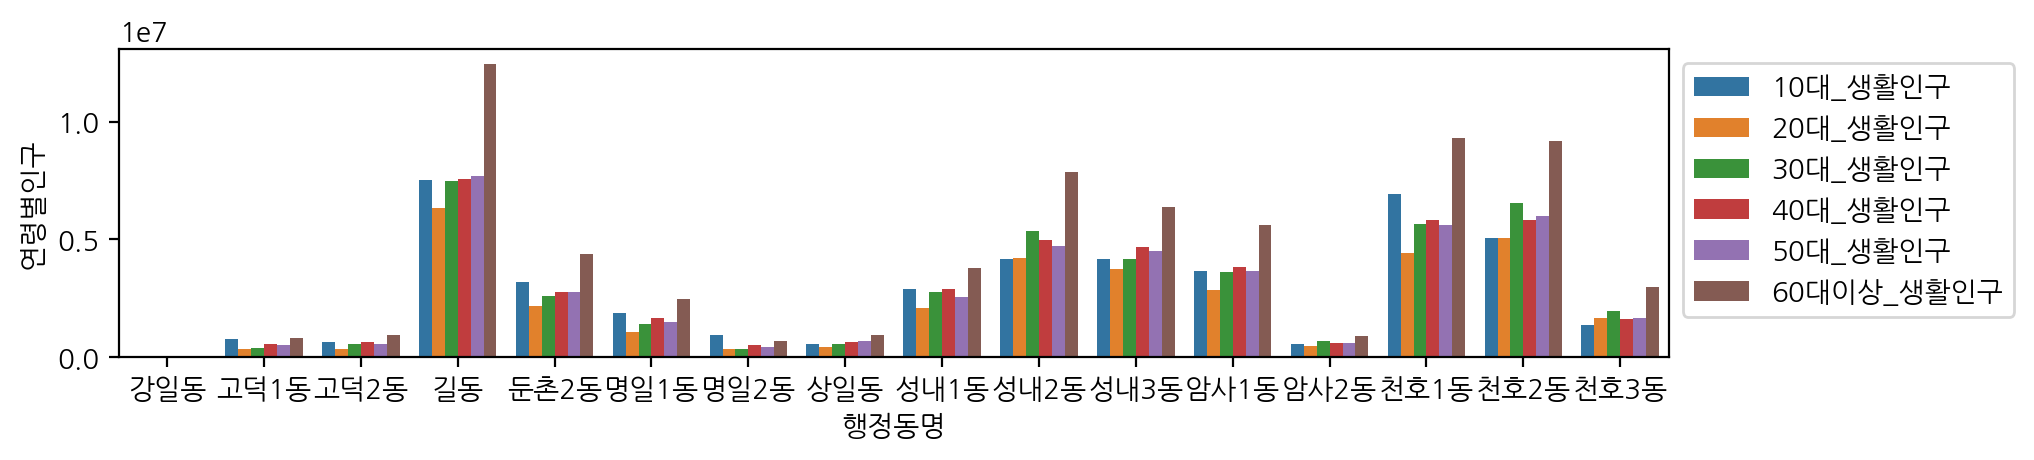

In [61]:
# 색을 많이 써서 좋지 않은 그래프.
# 60대 이상 유동인구가 많다. 총인구가 많기 때문일까, 60대 이상 유동인구가 그냥 많은걸까?
plt.figure(figsize=(10,2))
sns.barplot(data=df_gu_age, x="행정동명", y="연령별인구", hue="연령별", estimator=sum, ci=None)
plt.legend(bbox_to_anchor=(1,1))

### 구- 행정동별 유동시간

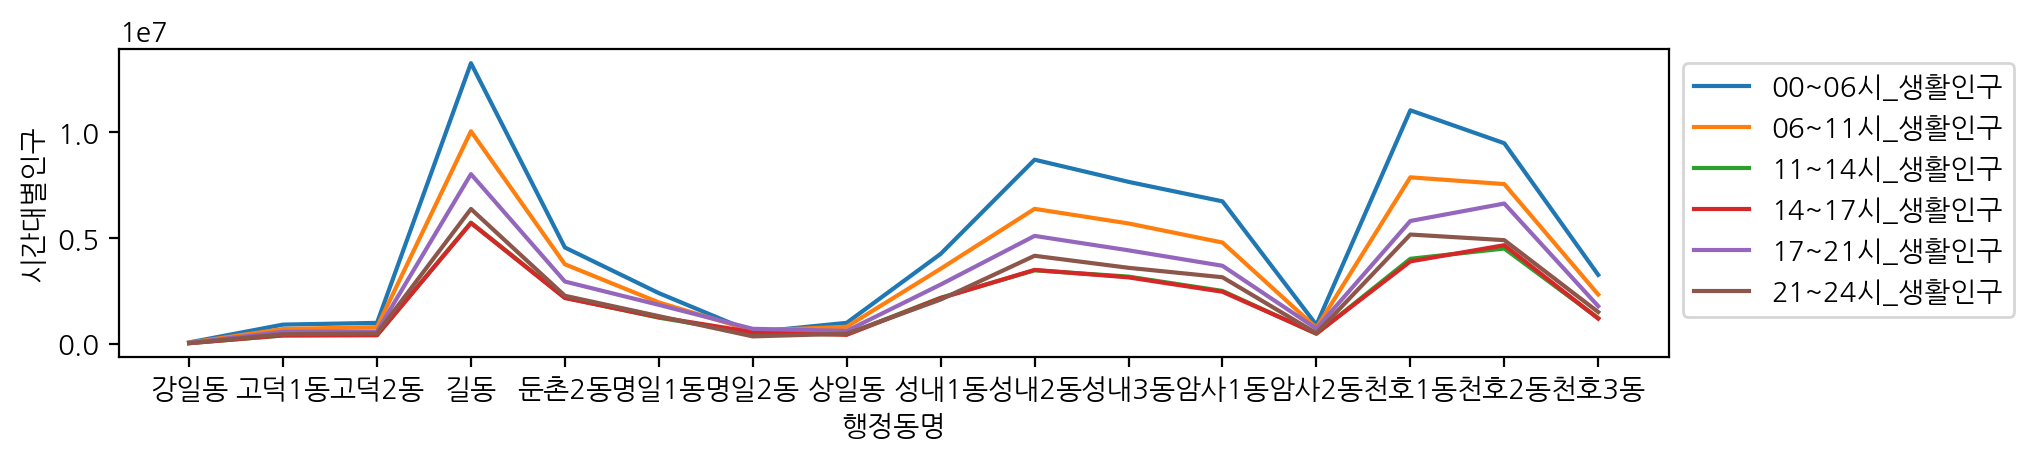

In [62]:
# 확실히 00-06시 유동인구가 많다. 출퇴근이라면 06-11시가 많을것이라고 생각했는데?!
plt.figure(figsize=(10,2))
sns.lineplot(data=df_gu_time, x="행정동명", y="시간대별인구", hue="시간대별", estimator=sum, ci=None)
plt.legend(bbox_to_anchor=(1,1))

### 구- 행정동별 요일별 인구

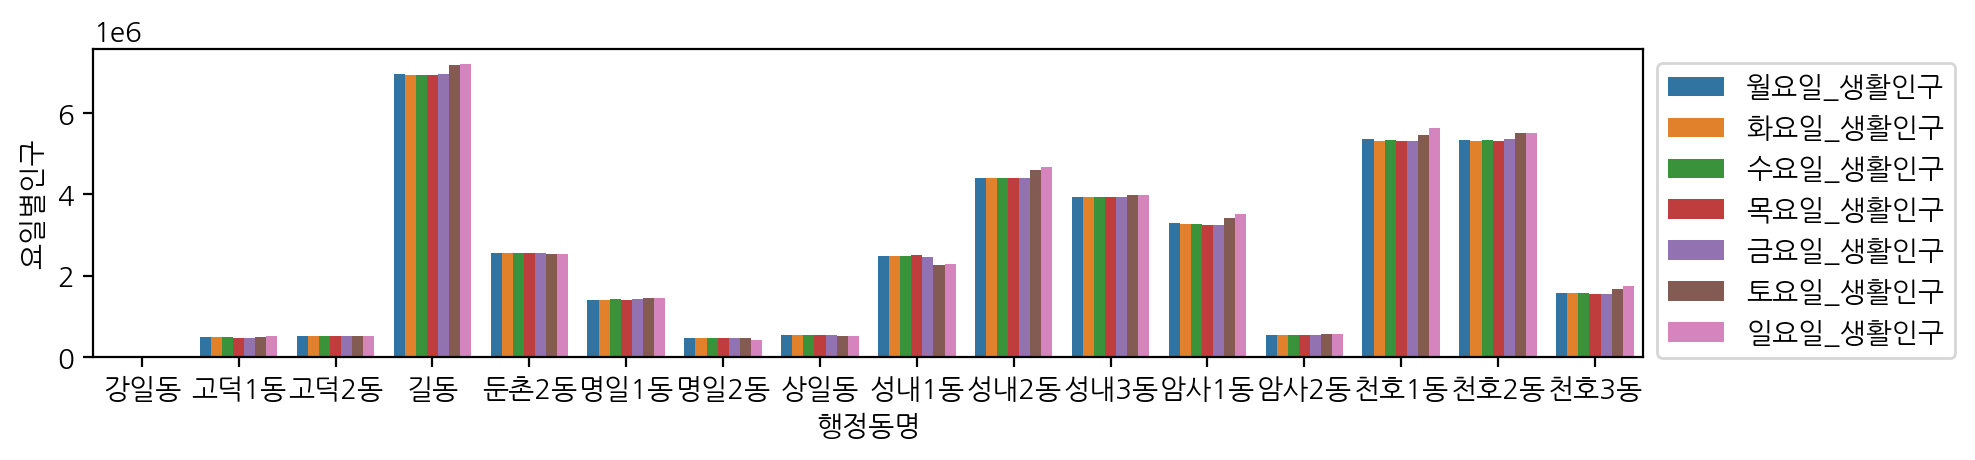

In [63]:
# 필요없는 그래프
# 왜냐면 요일별 눈에 띄는 인구 차이가 없기 때문이다.
# 그런데 구로3동은 다른 지역과 시간대별 유동인구도, 요일별 유동인구도 다른 경향을 보인다.
# 다른 구를 sample로 뽑았을 때도 이런 특이 사항들이 있을까?
plt.figure(figsize=(10,2))
sns.barplot(data=df_gu_week, x="행정동명", y="요일별인구", hue="요일별", ci=None)
plt.legend(bbox_to_anchor=(1,1))

## 행정동명 df_dong

### 동- 성별별

<AxesSubplot:xlabel='행정동명', ylabel='성별별인구'>

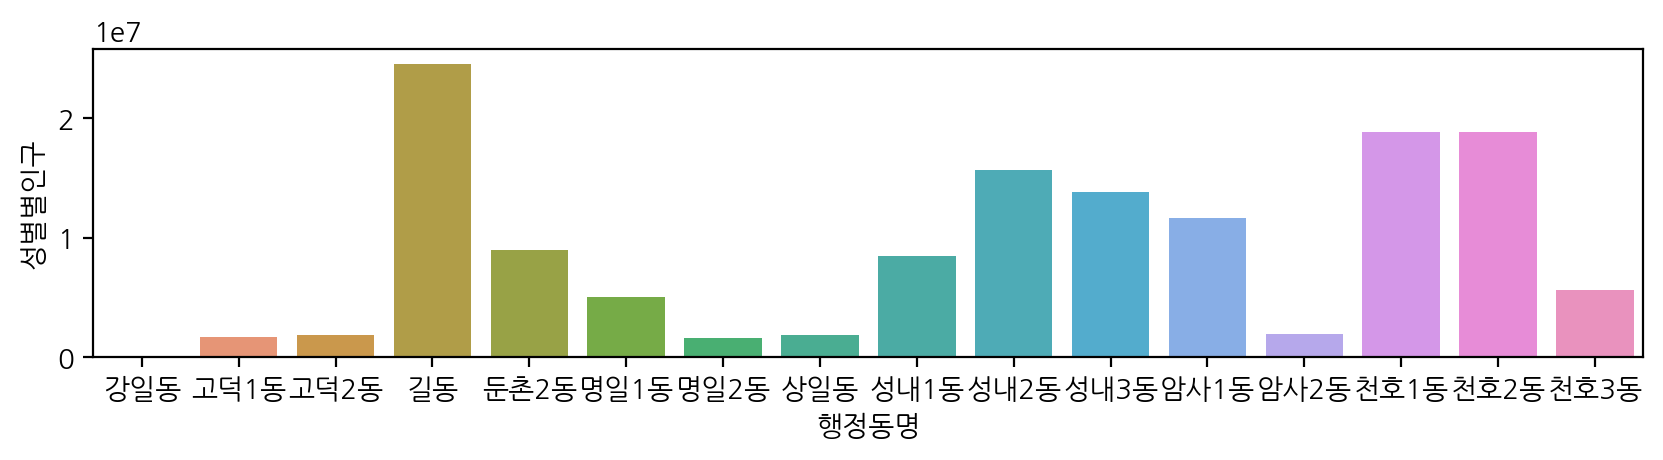

In [69]:
# 성별별 인구
plt.figure(figsize=(10,2))
sns.barplot(data=df_dong_sex, x="행정동명", y="성별별인구", ci=None)

### 동- 연령대별

<AxesSubplot:xlabel='행정동명', ylabel='연령별인구'>

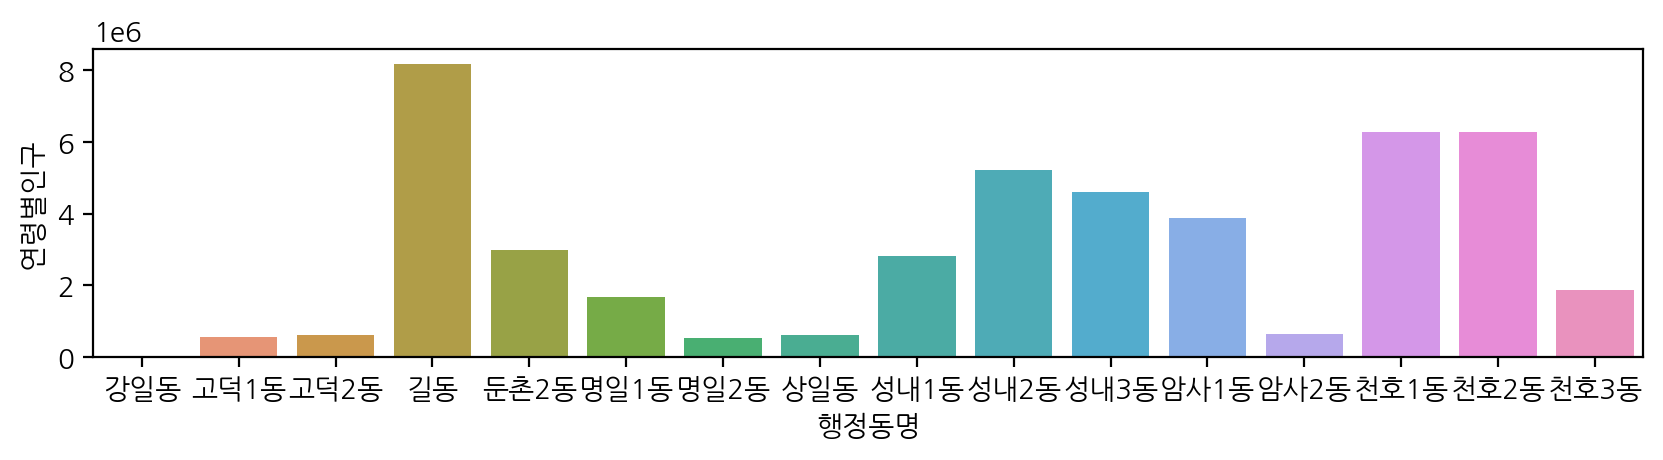

In [72]:
plt.figure(figsize=(10,2))
sns.barplot(data=df_dong_age, x="행정동명", y="연령별인구", ci=None)

<AxesSubplot:xlabel='연령별', ylabel='연령별인구'>

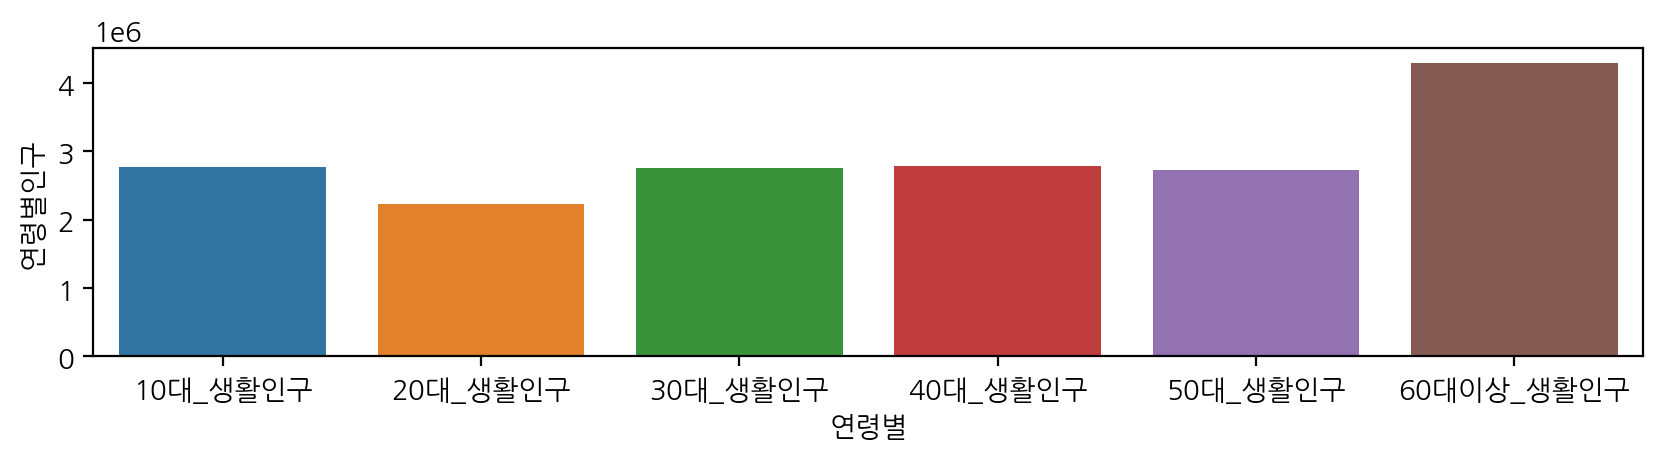

In [74]:
# 5.1.4 구-행정동별에서 보면 신도림동의 연령대별 인구 차이는 주목되지 않는데,
# 따로 떼와서 보니 시각적으로 와닿는 것이 있다.
plt.figure(figsize=(10,2))
sns.barplot(data=df_dong_age, x="연령별", y="연령별인구", ci=None)

### 동- 시간대별

<AxesSubplot:xlabel='시간대별', ylabel='시간대별인구'>

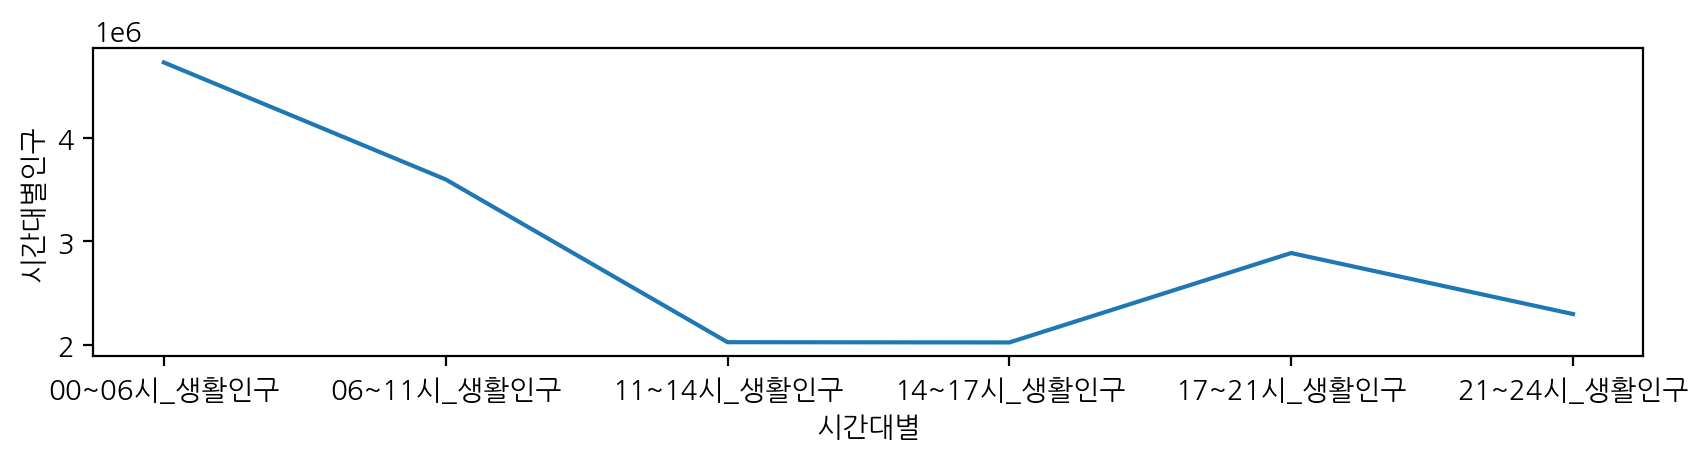

In [76]:
plt.figure(figsize=(10,2))
sns.lineplot(data=df_dong_time, x="시간대별", y="시간대별인구", ci=None)

### 동- 요일별

<AxesSubplot:xlabel='요일별', ylabel='요일별인구'>

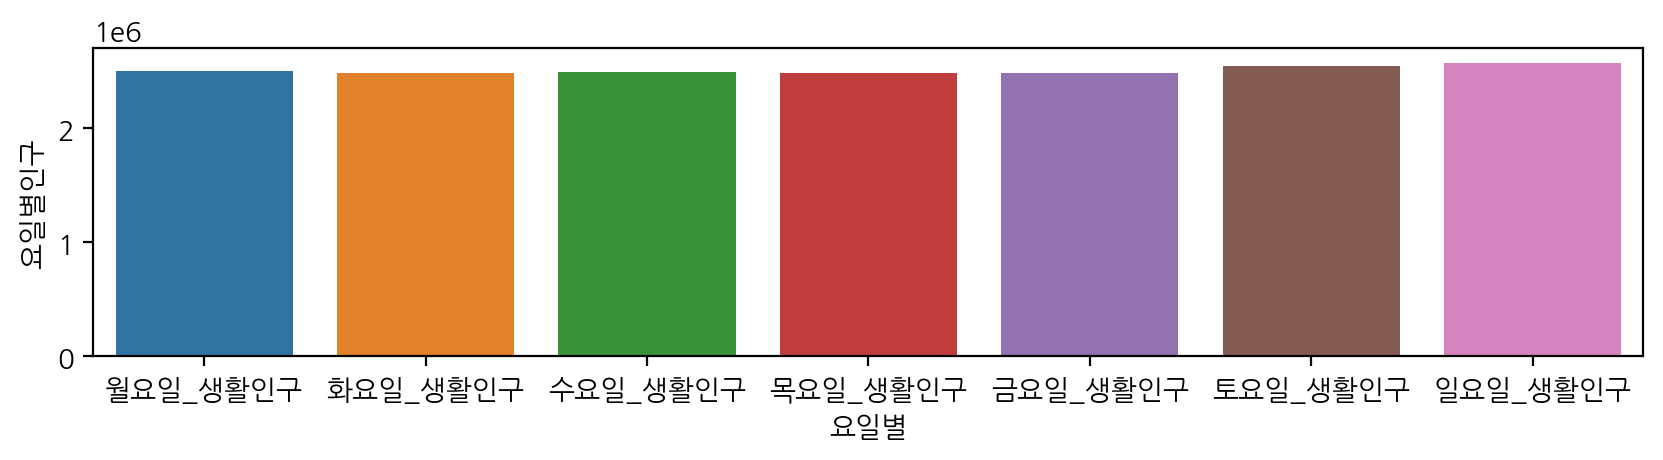

In [77]:
# 주말이 유동인구가 많을 것이라고 예상했지만, 의외로 일반 지역들은 평일 주말 차이가 크지 않다.
# 다른 지역을 안봐서, 일반화인가?
plt.figure(figsize=(10,2))
sns.barplot(data=df_dong_week, x="요일별", y="요일별인구", ci=None)

## 여러 조건 조합

### 성별별 연령대별 유동인구

In [79]:
# df_sex_dong, df_age_dong 을 merge
x = pd.merge(df_dong_sex, df_dong_age, on=['시군구명', '행정동명'], how='left')
x.head(2)

,시군구명,행정동명,총_생활인구_수,성별별,성별별인구,연령별,연령별인구
0,강동구,강일동,263783,남성_생활인구,129719,10대_생활인구,53681
1,강동구,강일동,263783,남성_생활인구,129719,20대_생활인구,25666


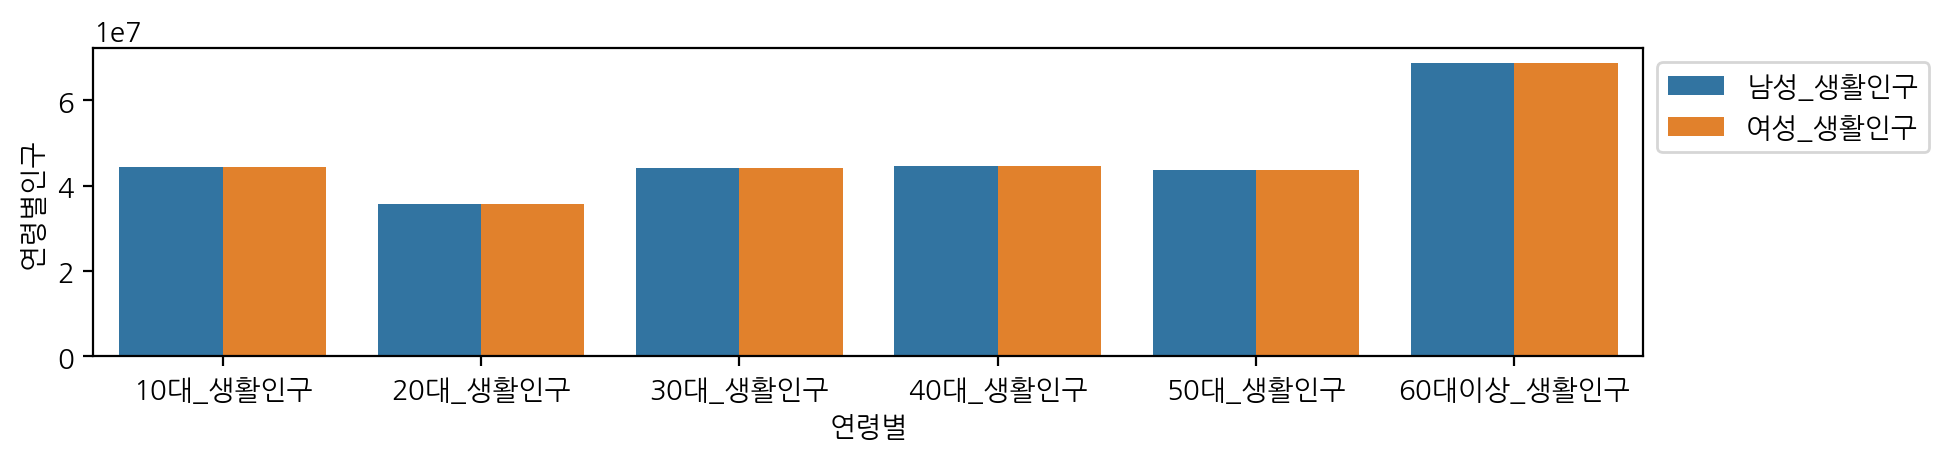

In [81]:
# 잘못나온 것 같은데, 그룹바이 같은거 써서 다시 시도해보기
plt.figure(figsize=(10,2))
sns.barplot(data=x, x="연령별", y="연령별인구", hue="성별별", estimator=sum, ci=None)
plt.legend(bbox_to_anchor=(1,1))

### 두 개 그래프를 한곳에 표시하기 ex) barplot, lineplot

In [55]:
# lineplot으로 행정동 총 유동인구, lineplot으로 구별 총 유동인구 비교 하고 싶습니다.

# 데이터분석용 시각화

## 구별 총유동인구

In [83]:
move_pop_m.pivot_table(index="시군구명", values="총_생활인구_수", aggfunc=sum).sort_values("총_생활인구_수", ascending=False)

,총_생활인구_수
시군구명,
강남구,329704232
강동구,280956360
송파구,279306289
관악구,278221761
은평구,250660214
강서구,244861550
마포구,236538403
서초구,227805969
광진구,227338959


In [84]:
move_pop_m.sort_values("총_생활인구_수", ascending=False).head(10)

,기준_년코드,시군구명,행정동명,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,20대_생활인구,30대_생활인구,...,17~21시_생활인구,21~24시_생활인구,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드
193,2021,마포구,서교동,118658124,64345677,29530287,34815382,6212262,19704022,14020070,...,13815142,7354820,8959565,9050591,9199201,9232178,9417558,9603205,8883369,640676960
61,2021,강서구,화곡1동,59252260,62821237,29242857,33578381,7230347,10492149,12501729,...,10562218,8420753,8877402,8770883,8788932,8779274,8816277,9286845,9501627,322015120
16,2021,강남구,역삼1동,118512924,54724035,28511886,26212144,3674197,11808910,15168893,...,9540735,5258890,8454359,8775945,8665973,8753157,8388746,6078352,5607508,654115840
23,2021,강동구,길동,67668124,49060810,22518053,26542746,7533041,6331603,7485120,...,8008300,6363622,6959667,6929424,6934211,6922101,6943967,7167201,7204233,375701920
11,2021,강남구,삼성2동,59255148,48283925,24668553,23615363,5331617,8513610,11866290,...,8537457,4601249,7400315,7692505,7599891,7702320,7407661,5454426,5026802,327056520
3,2021,강남구,논현1동,67738704,44557563,21989188,22568379,2989242,10329684,11862886,...,8125270,4743298,6612762,6788867,6742462,6791911,6712872,5716620,5192076,373776672
33,2021,강동구,천호1동,42258132,37730521,17537230,20193293,6916130,4434706,5643839,...,5797393,5157167,5367462,5313489,5334785,5301181,5309248,5464287,5640068,234812000
46,2021,강북구,수유3동,67728688,37712474,17783556,19928926,3596954,7194939,5493775,...,6694656,4873052,5384217,5392481,5391402,5378385,5432003,5417207,5316791,361780160
34,2021,강동구,천호2동,59223308,37666666,17707383,19959284,5040591,5064186,6549978,...,6619761,4892411,5322844,5309102,5345313,5319323,5349321,5515421,5505339,328737080
132,2021,노원구,상계2동,33884352,35668257,16073457,19594799,5696751,5426476,4436831,...,7026785,4246595,5024169,5022434,5025389,5012392,5089008,5311228,5183631,181610240


Text(0.5, 1.0, '시군구별 총 유동인구 수')

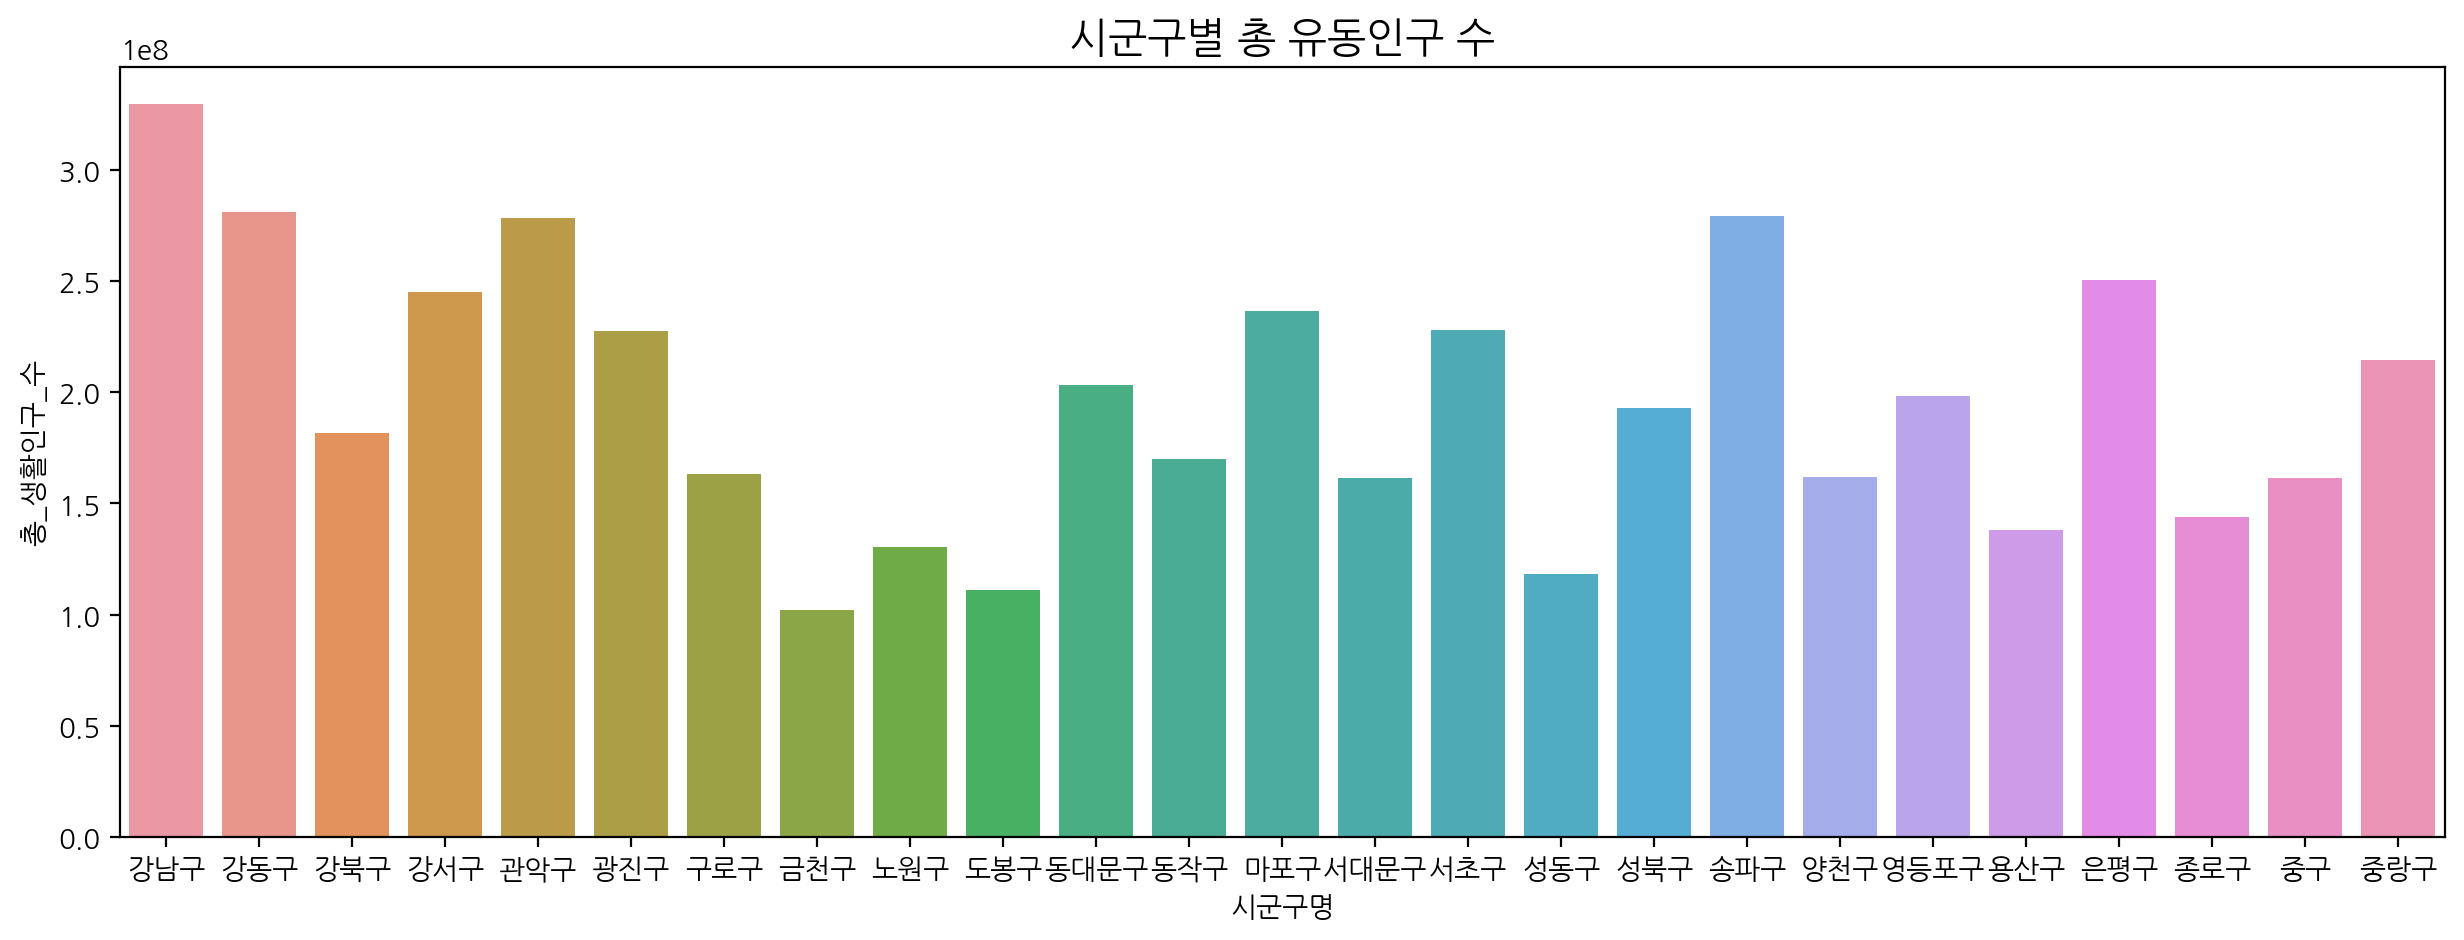

In [85]:
plt.figure(figsize=(15,5))
sns.barplot(data=move_pop_m, x="시군구명", y="총_생활인구_수", estimator=sum, ci=None)
plt.title("시군구별 총 유동인구 수", fontsize=15)

## 구별 연령별 유동인구

Text(0.5, 1.0, '시군구별 연령별 유동인구 수')

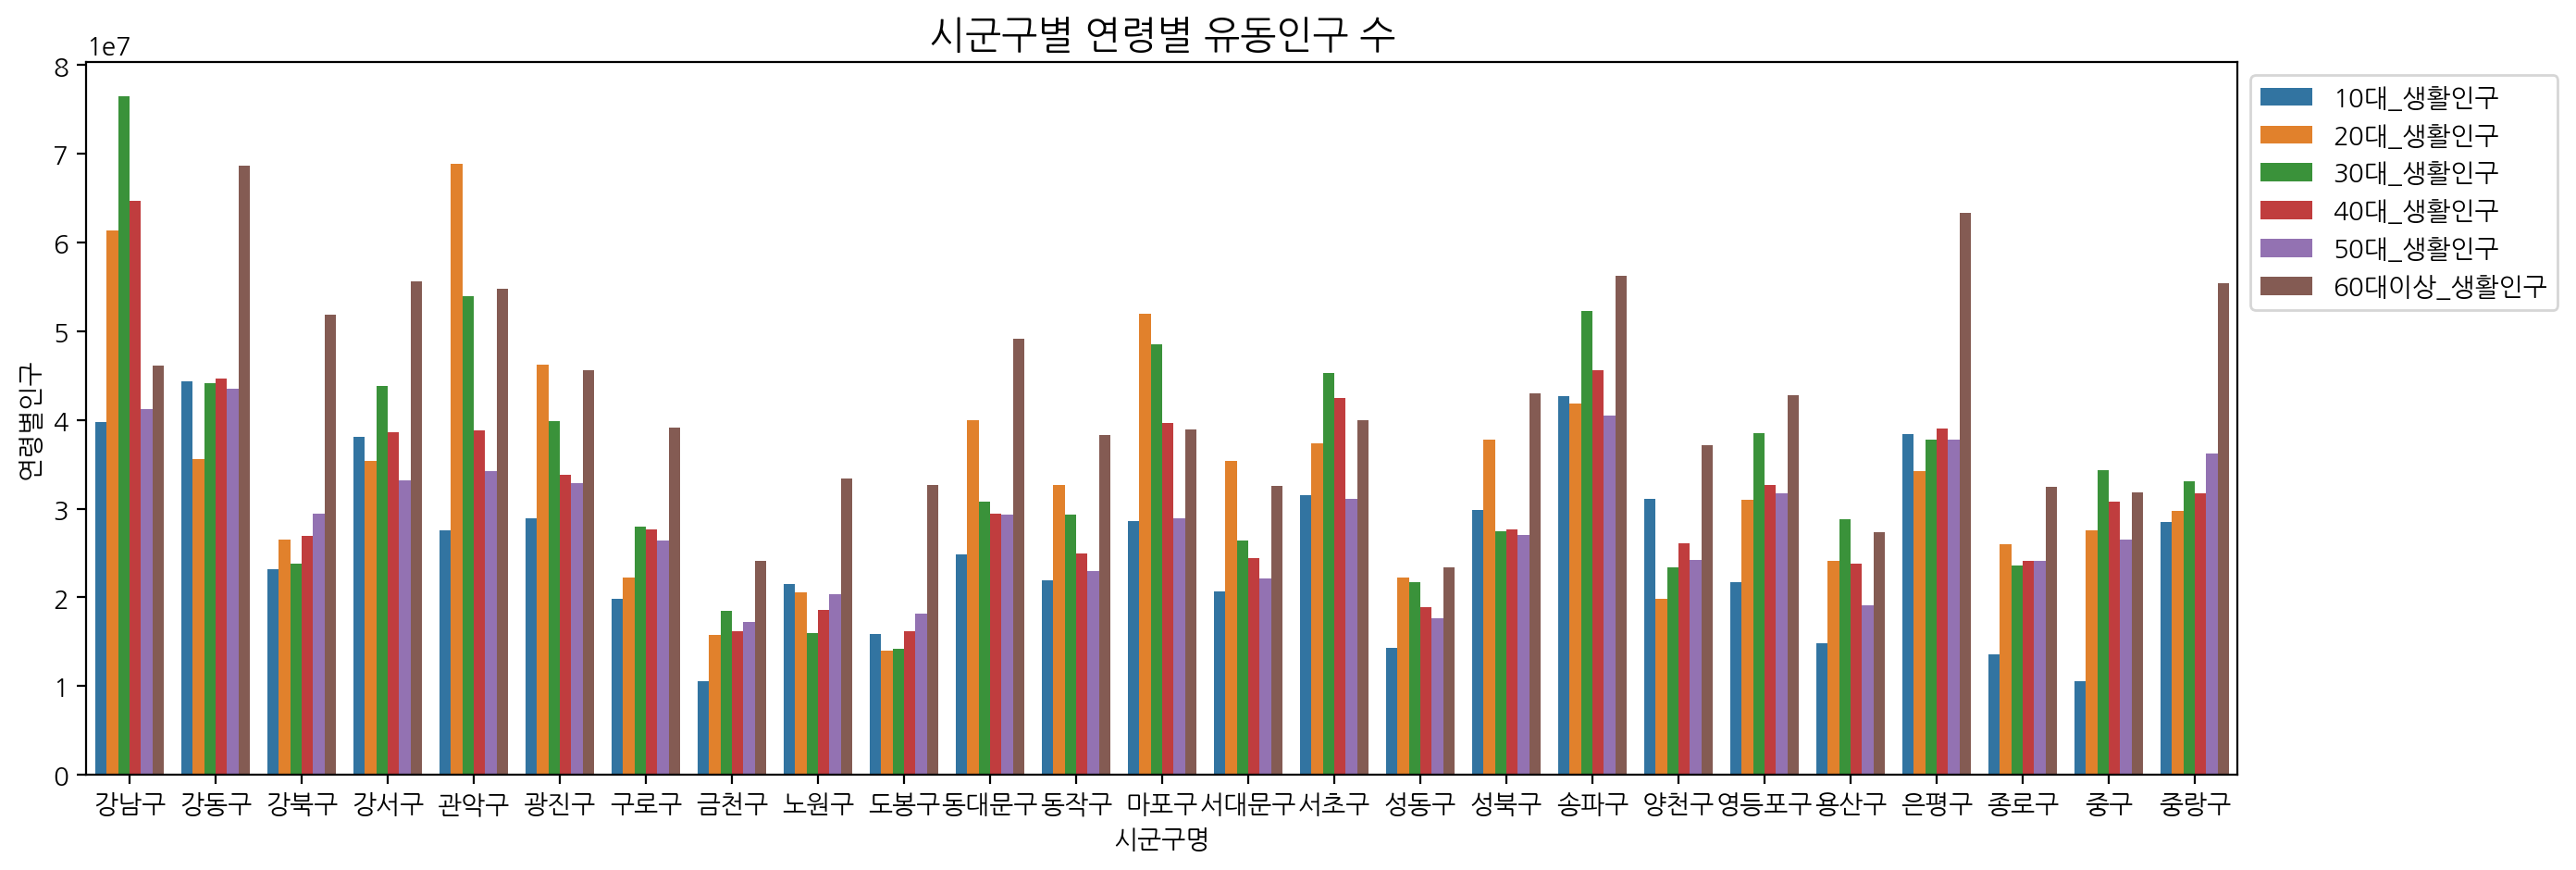

In [87]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_age, x="시군구명", y="연령별인구", hue="연령별", estimator=sum, ci=None)
plt.legend(bbox_to_anchor=(1,1))
plt.title("시군구별 연령별 유동인구 수", fontsize=15)

## 연령별 유동 인구

Text(0.5, 1.0, '연령별 유동인구 수')

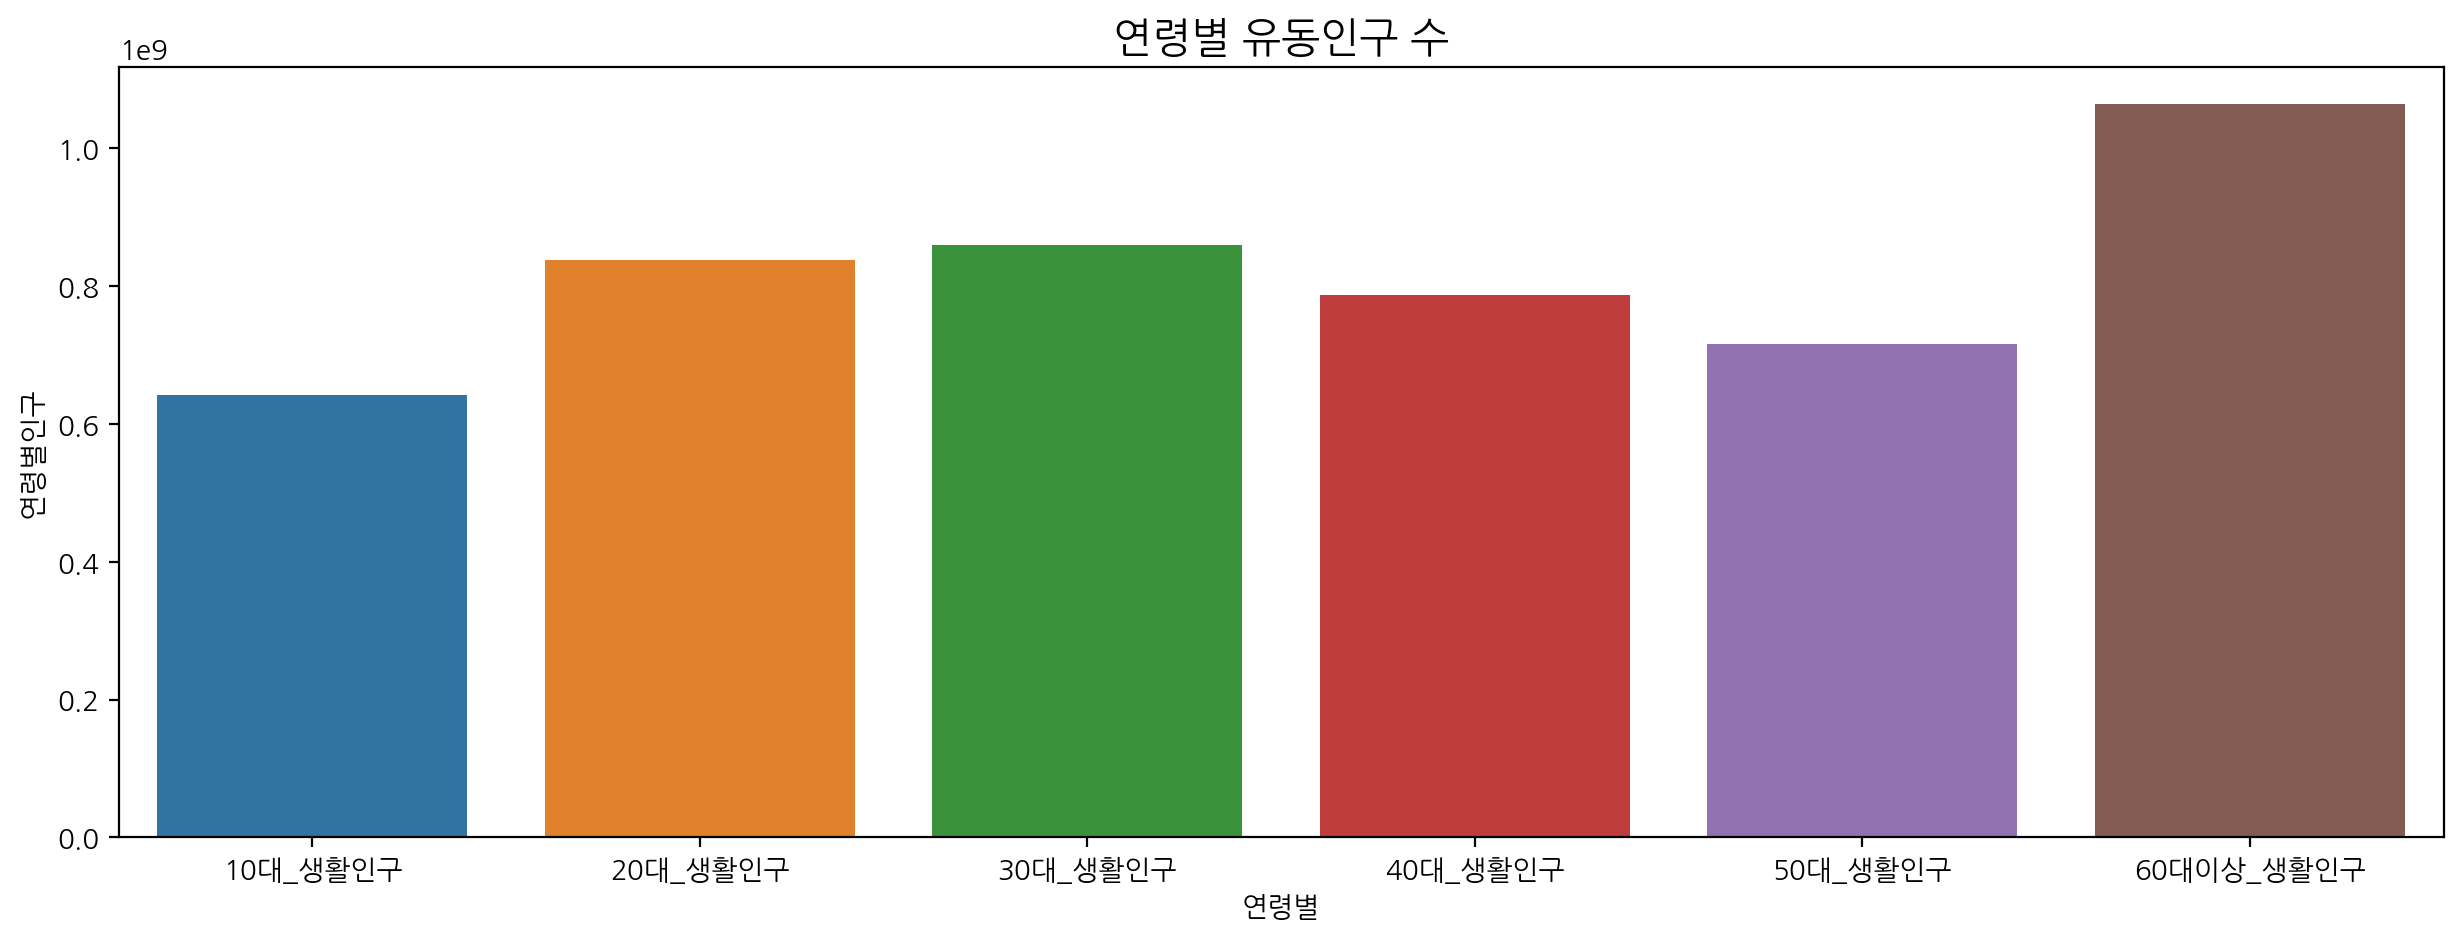

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_age, x="연령별", y="연령별인구",estimator=sum, ci=None)
plt.title("연령별 유동인구 수", fontsize=15)

## 구별 성별 유동인구

Text(0.5, 1.0, '시군구별 성별 유동인구 수')

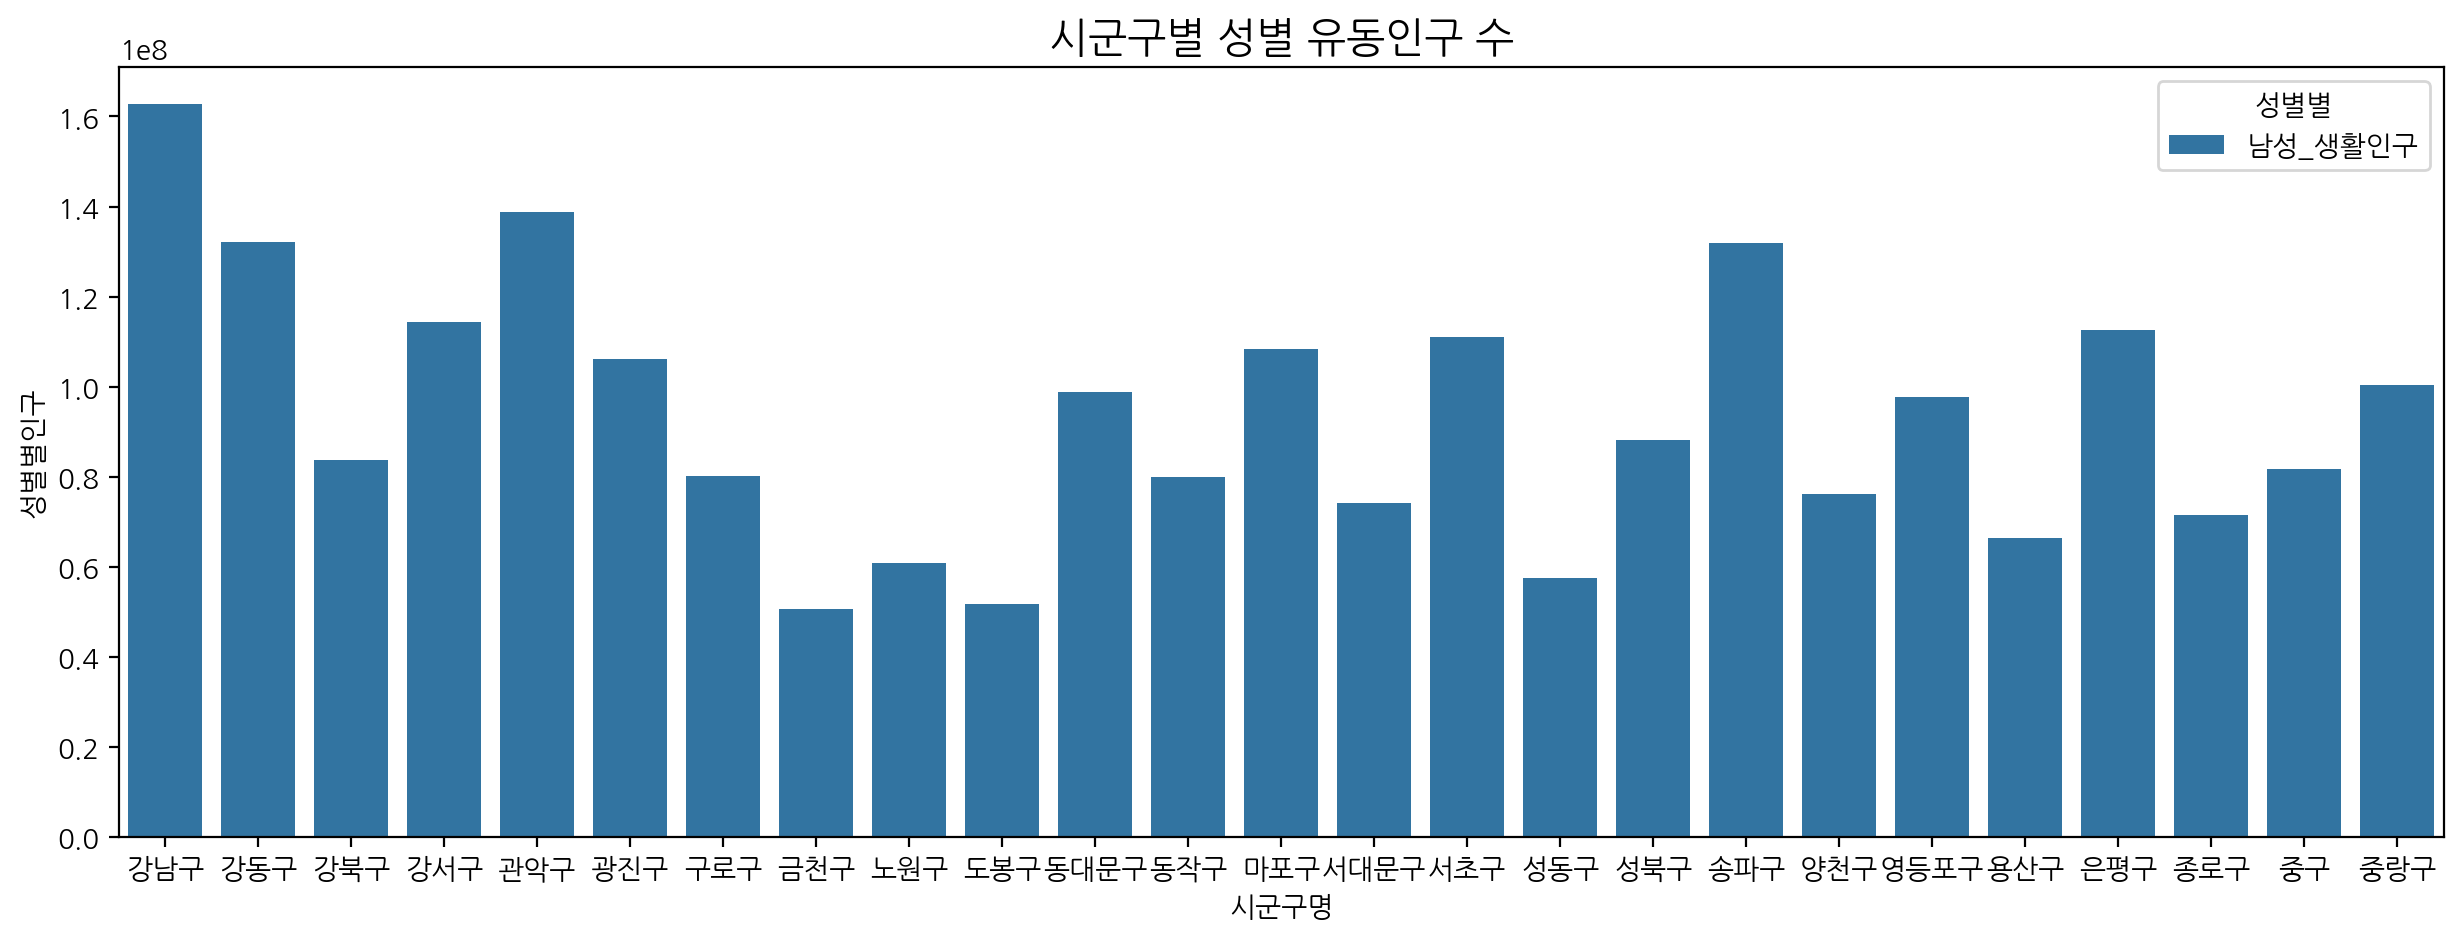

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_sex, x="시군구명", y="성별별인구", hue="성별별", estimator=sum, ci=None)
plt.title("시군구별 성별 유동인구 수", fontsize=15)

## 성별 유동인구

Text(0.5, 1.0, '성별 유동인구 수')

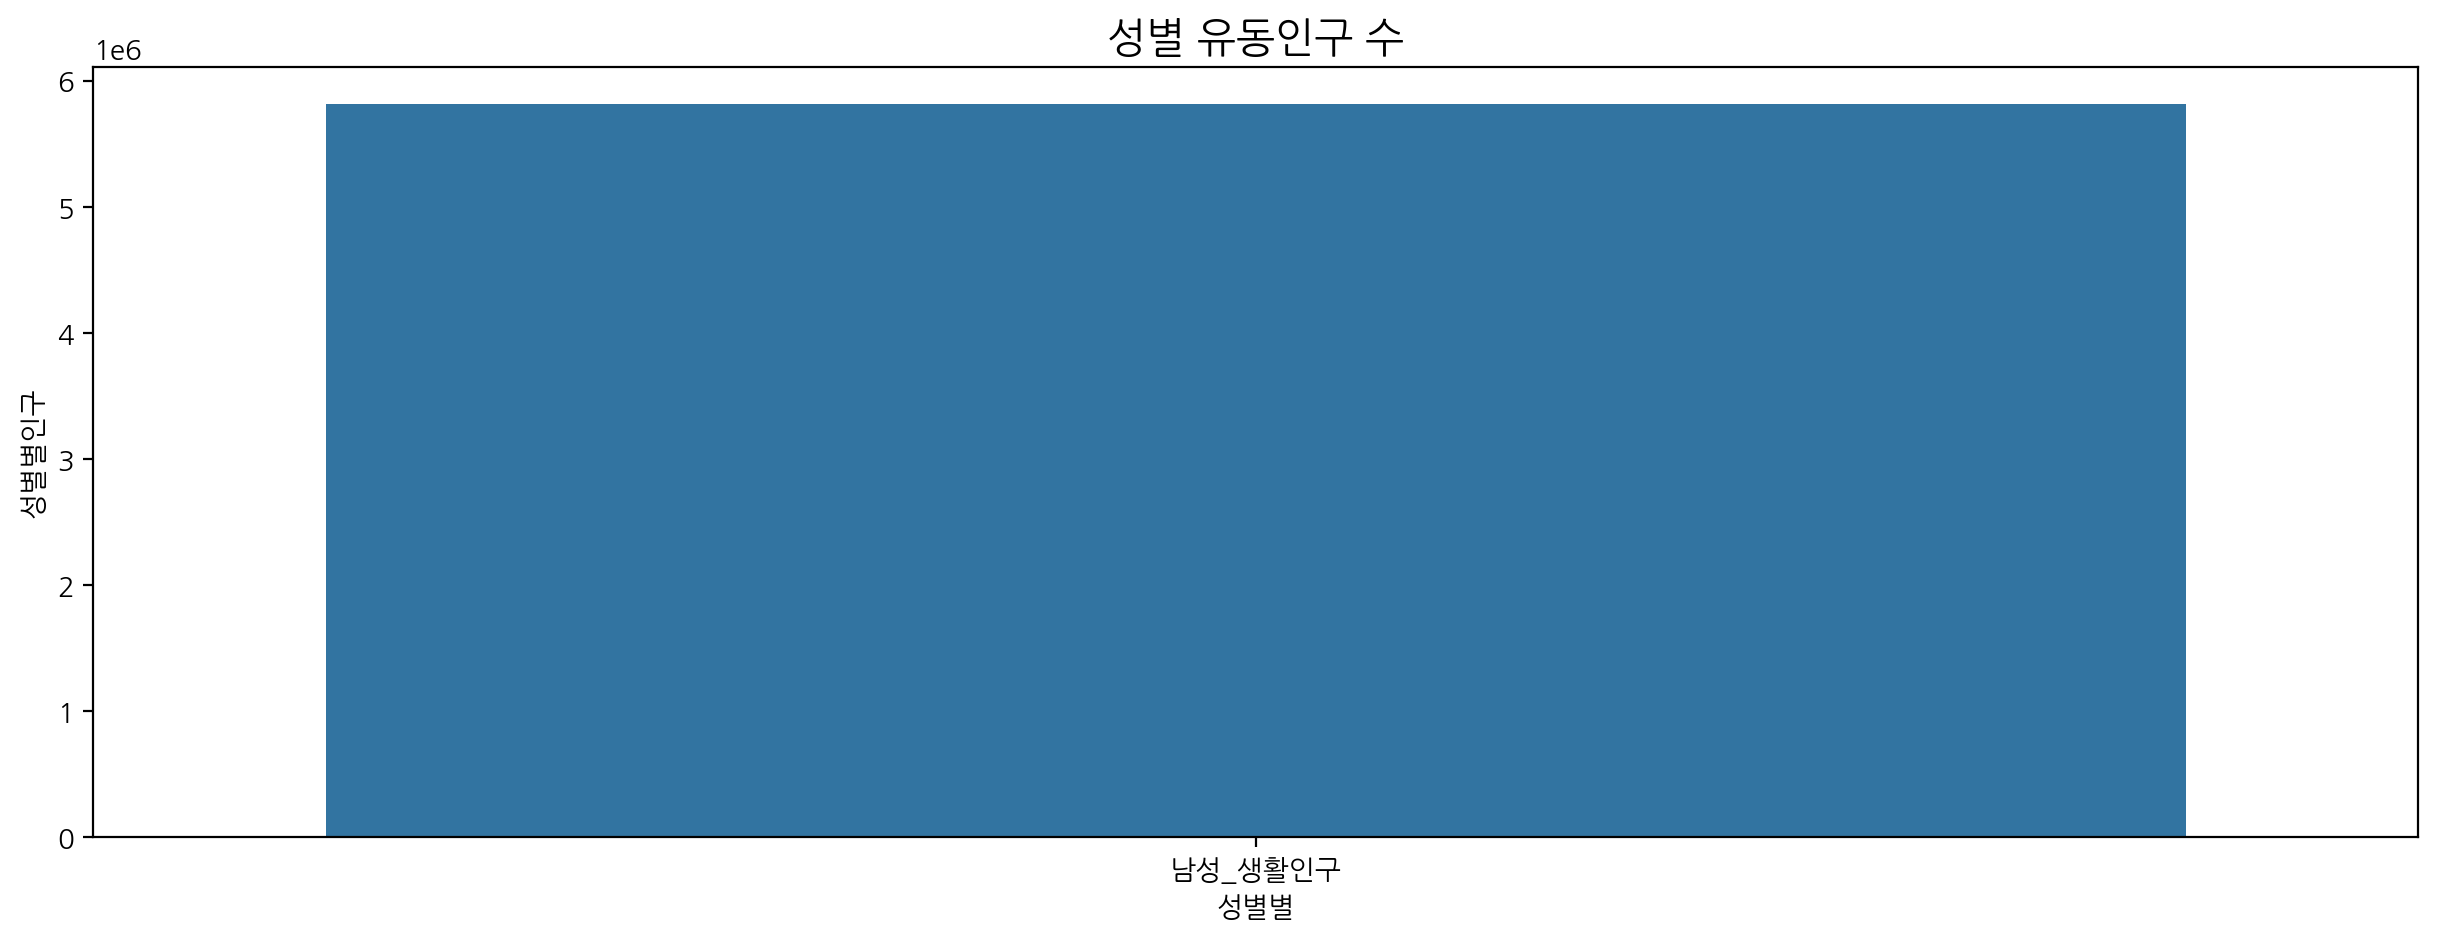

In [90]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_sex, x="성별별", y="성별별인구", ci=None)
plt.title("성별 유동인구 수", fontsize=15)

## 구별 시간대별 유동인구

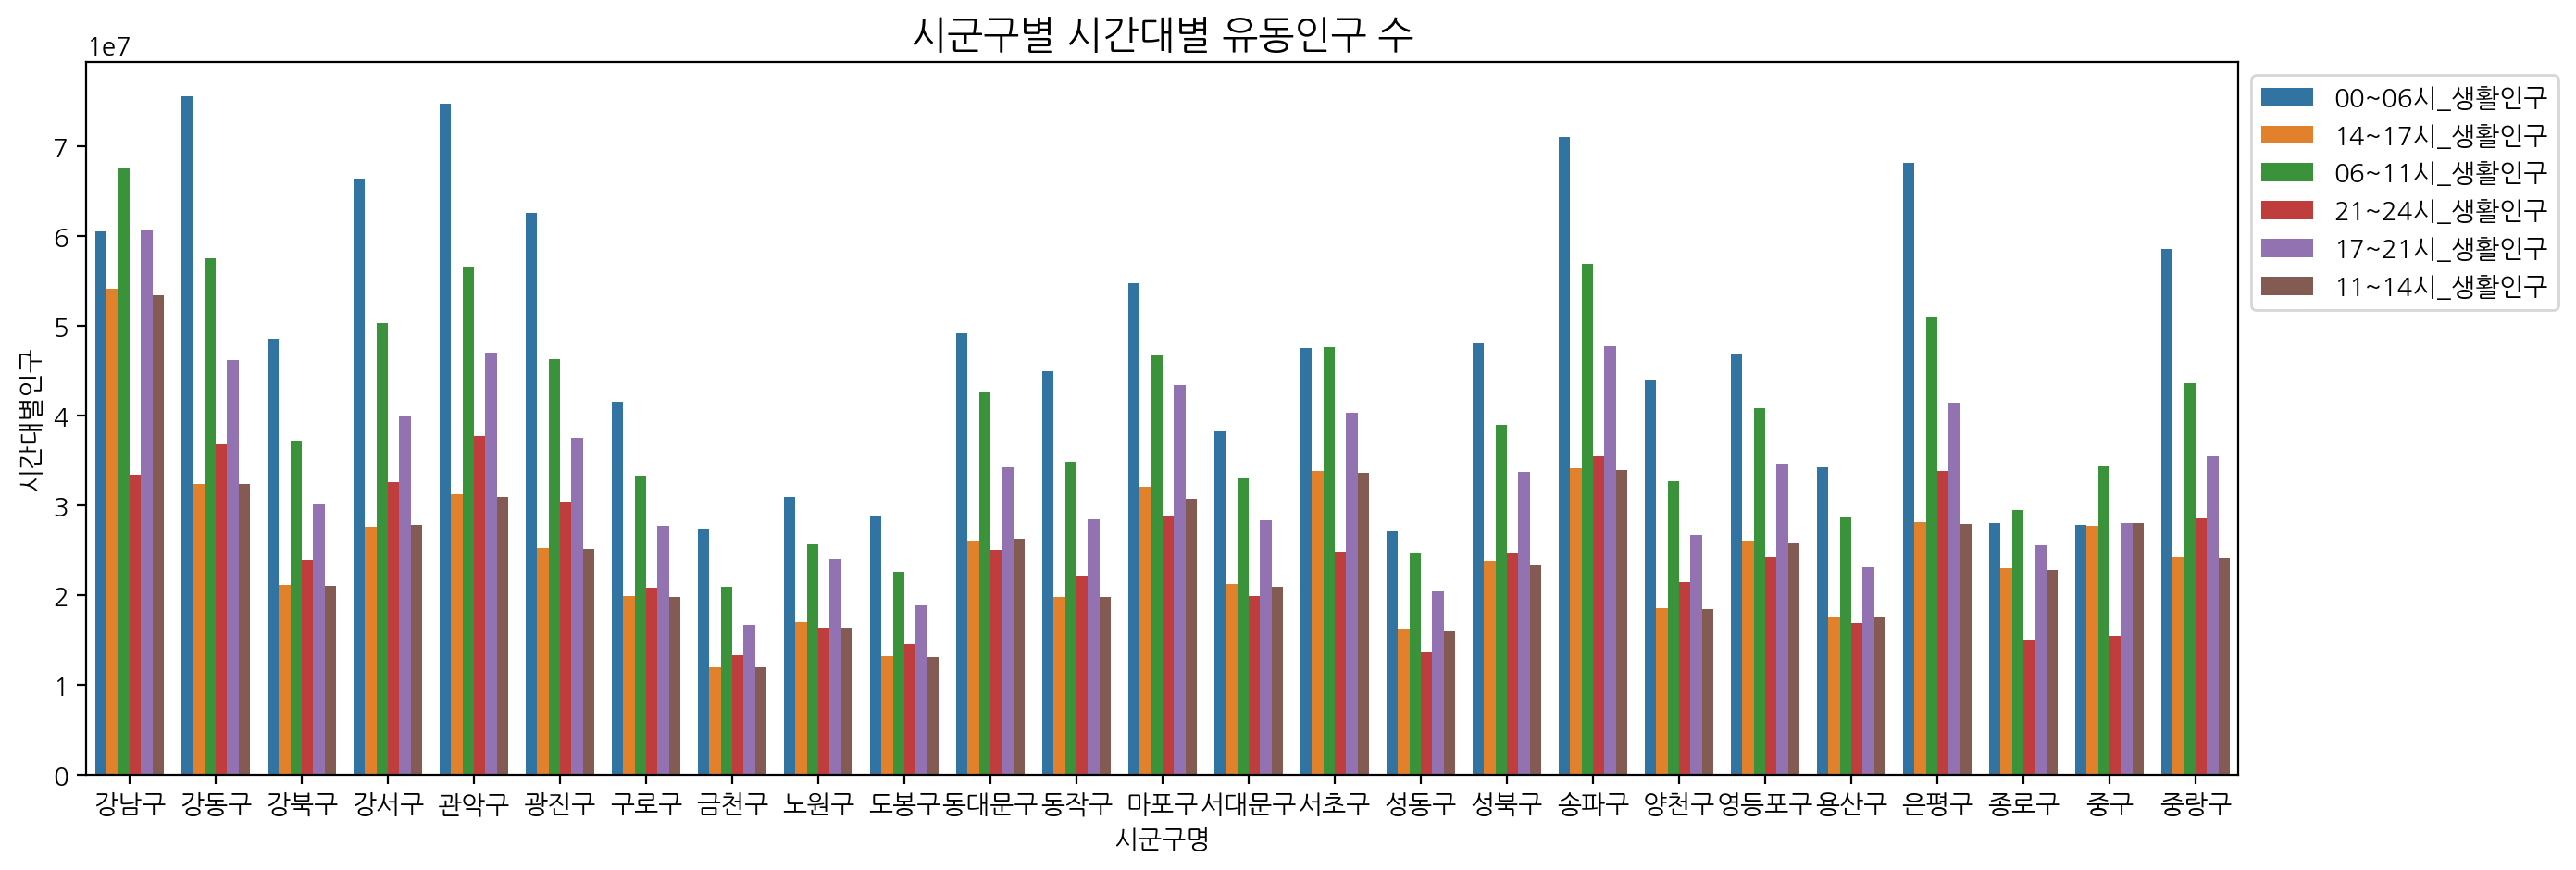

In [91]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_time.sort_values('시군구명'), x="시군구명", y="시간대별인구", hue="시간대별", estimator=sum, ci=None)
plt.title("시군구별 시간대별 유동인구 수", fontsize=15)
plt.legend(bbox_to_anchor=(1,1))

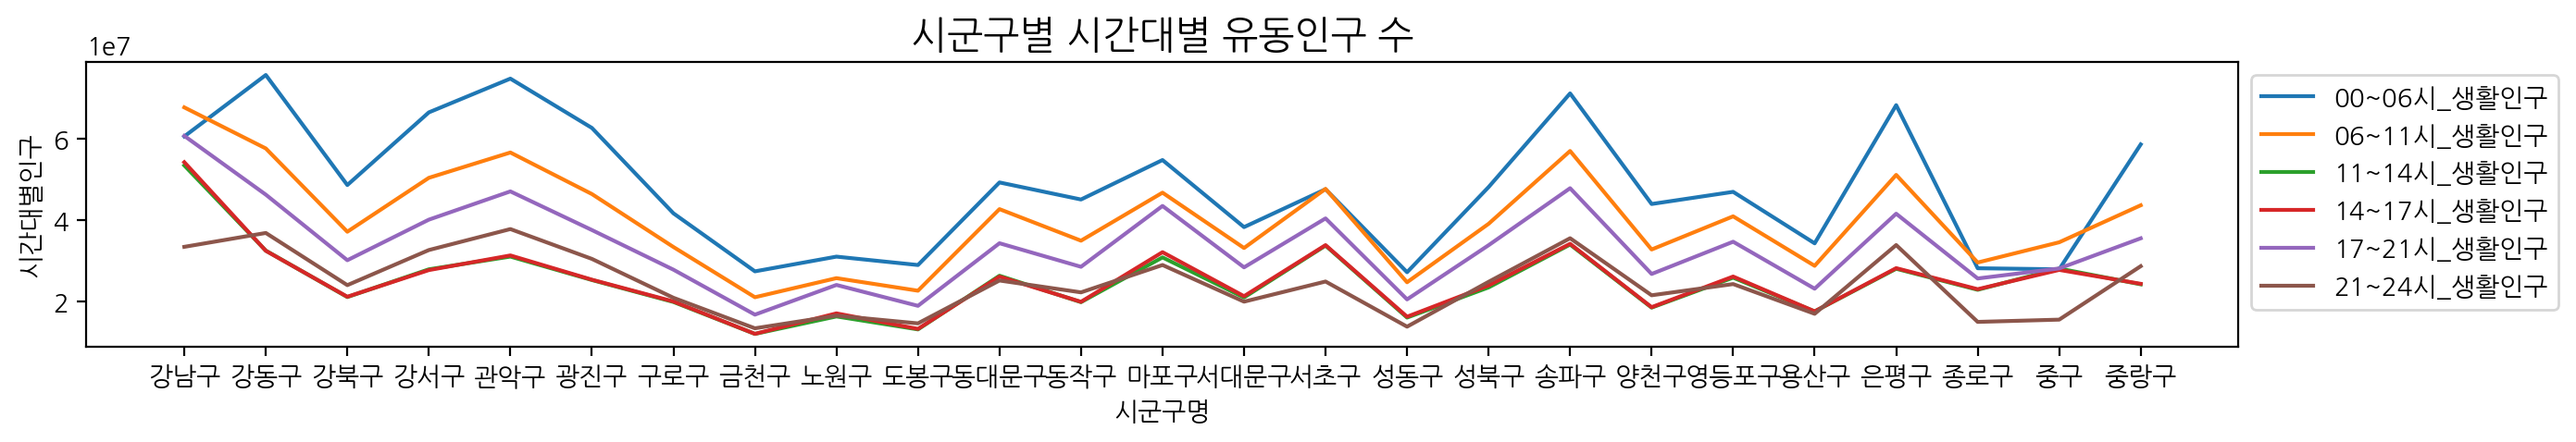

In [92]:
plt.figure(figsize=(15,2))
sns.lineplot(data=df_time, x="시군구명", y="시간대별인구", hue="시간대별", estimator=sum, ci=None)
plt.title("시군구별 시간대별 유동인구 수", fontsize=15)
plt.legend(bbox_to_anchor=(1,1))

## 시간대별 유동인구

Text(0.5, 1.0, '시간대별 유동인구 수')

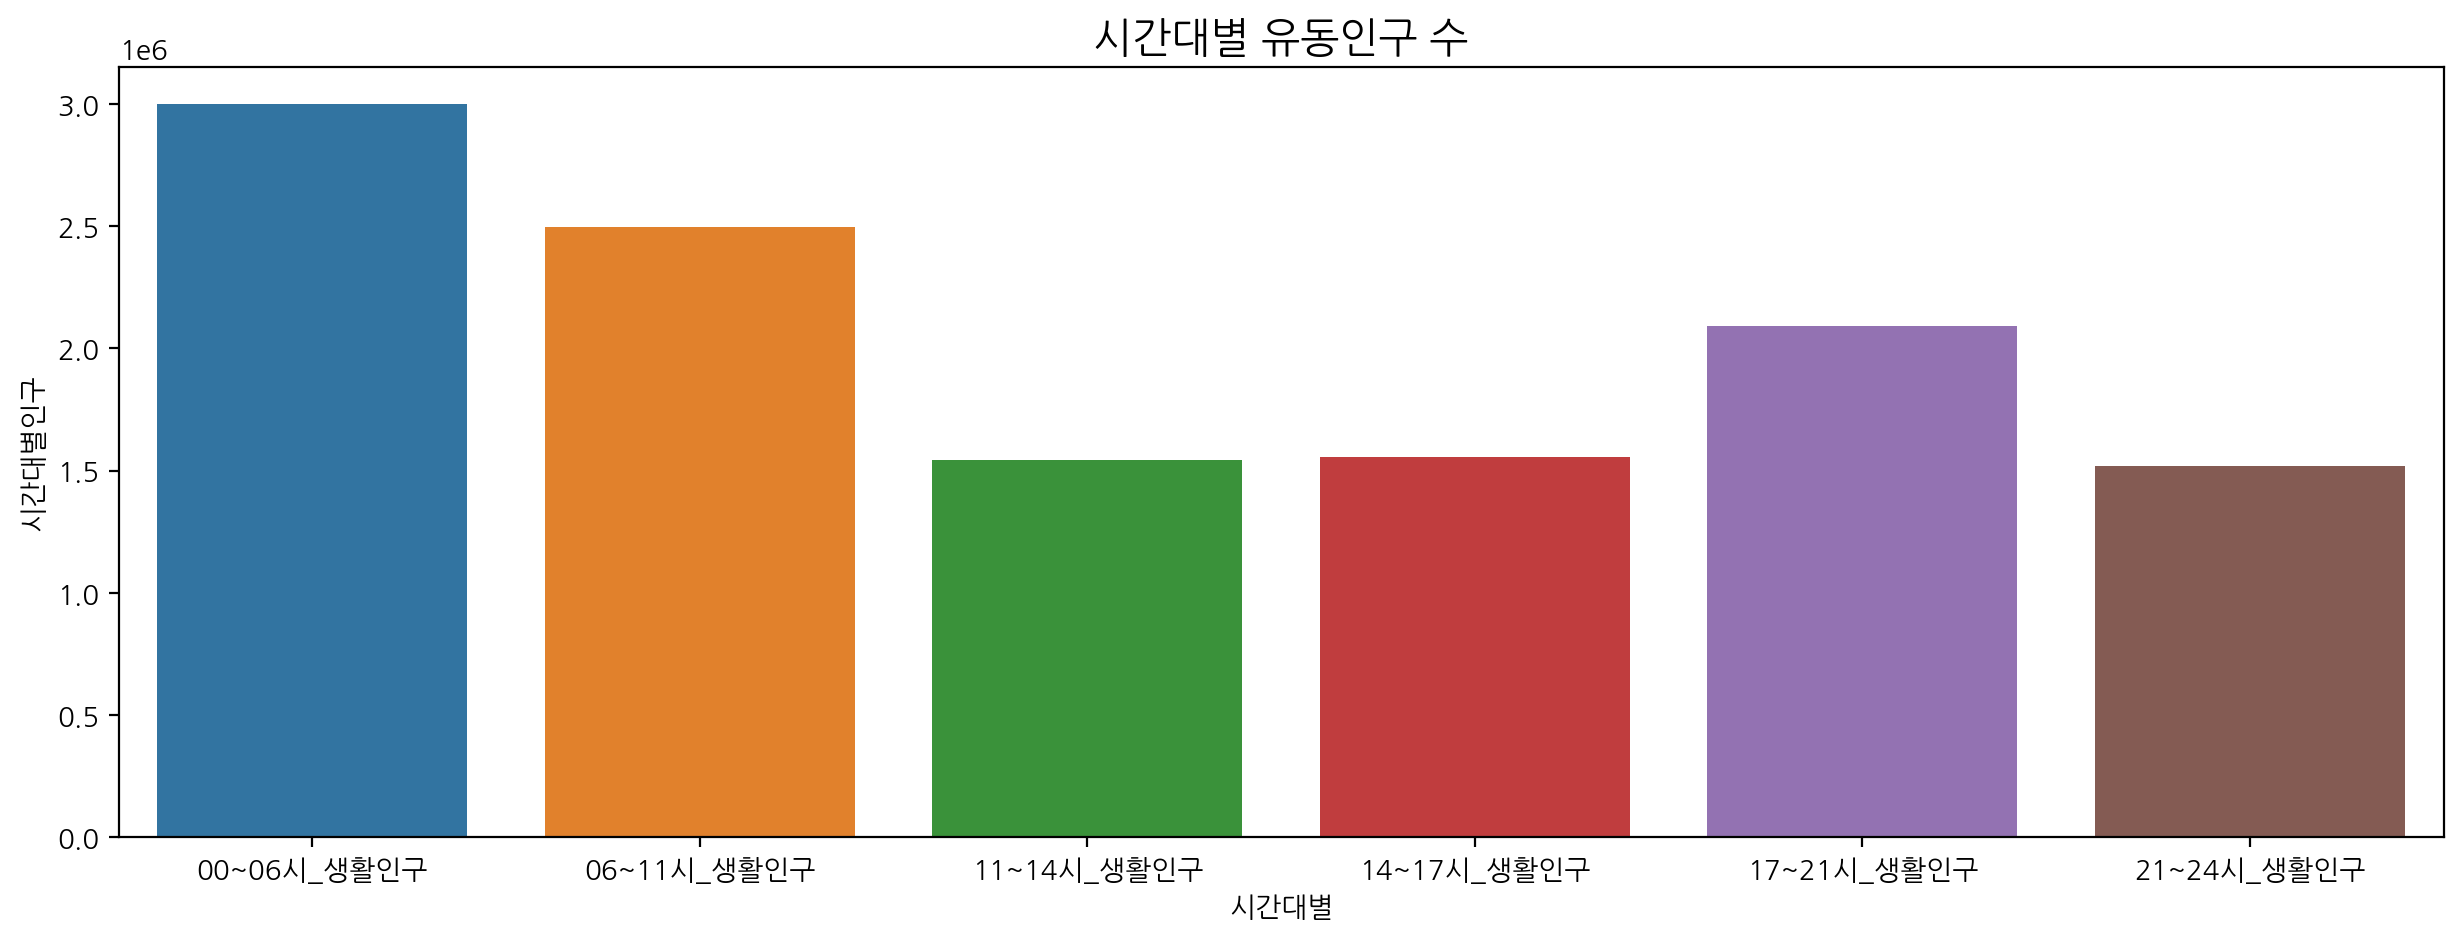

In [93]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_time, x="시간대별", y="시간대별인구", ci=None)
plt.title("시간대별 유동인구 수", fontsize=15)

## 구별 요일별 유동인구

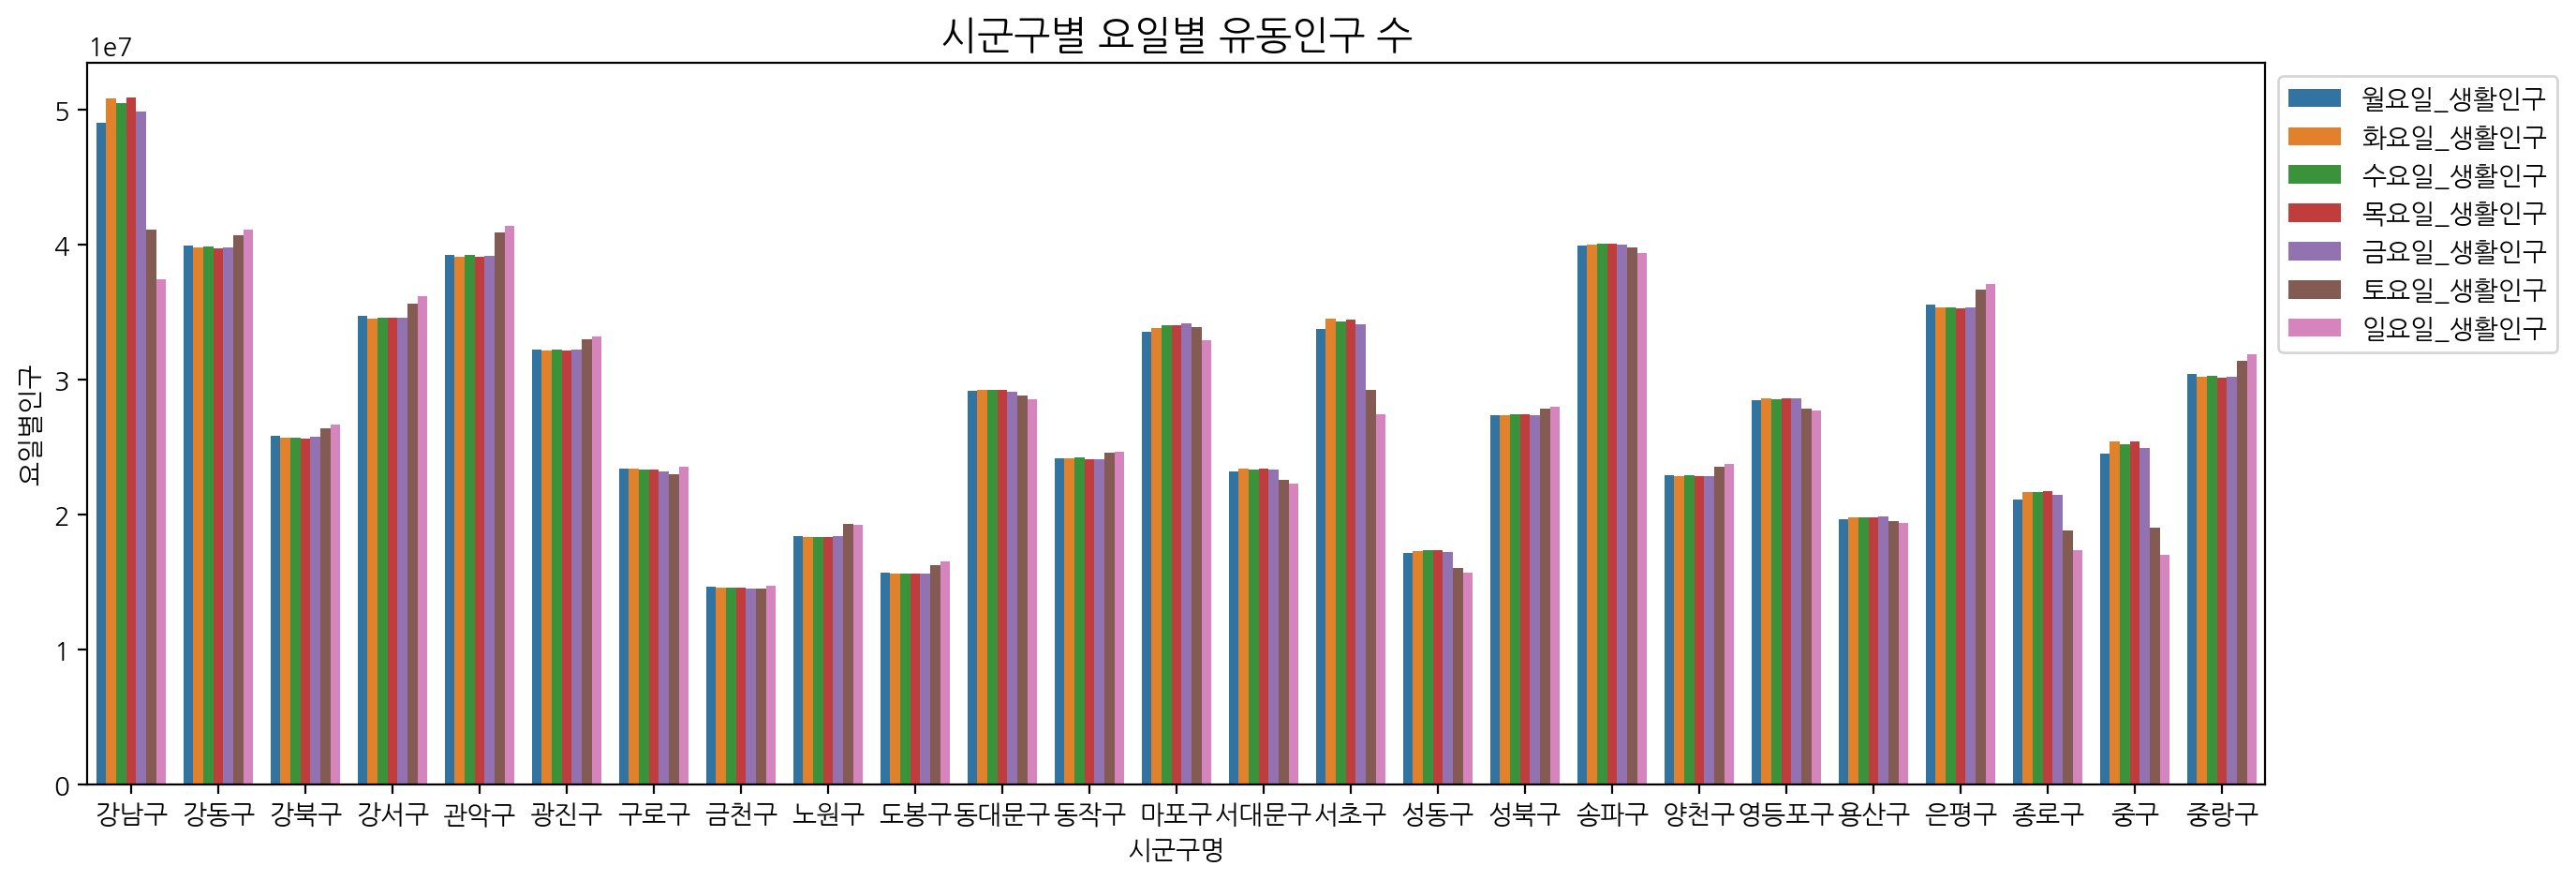

In [94]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_week, x="시군구명", y="요일별인구", hue="요일별", estimator=sum, ci=None)
plt.title("시군구별 요일별 유동인구 수", fontsize=15)
plt.legend(bbox_to_anchor=(1,1))

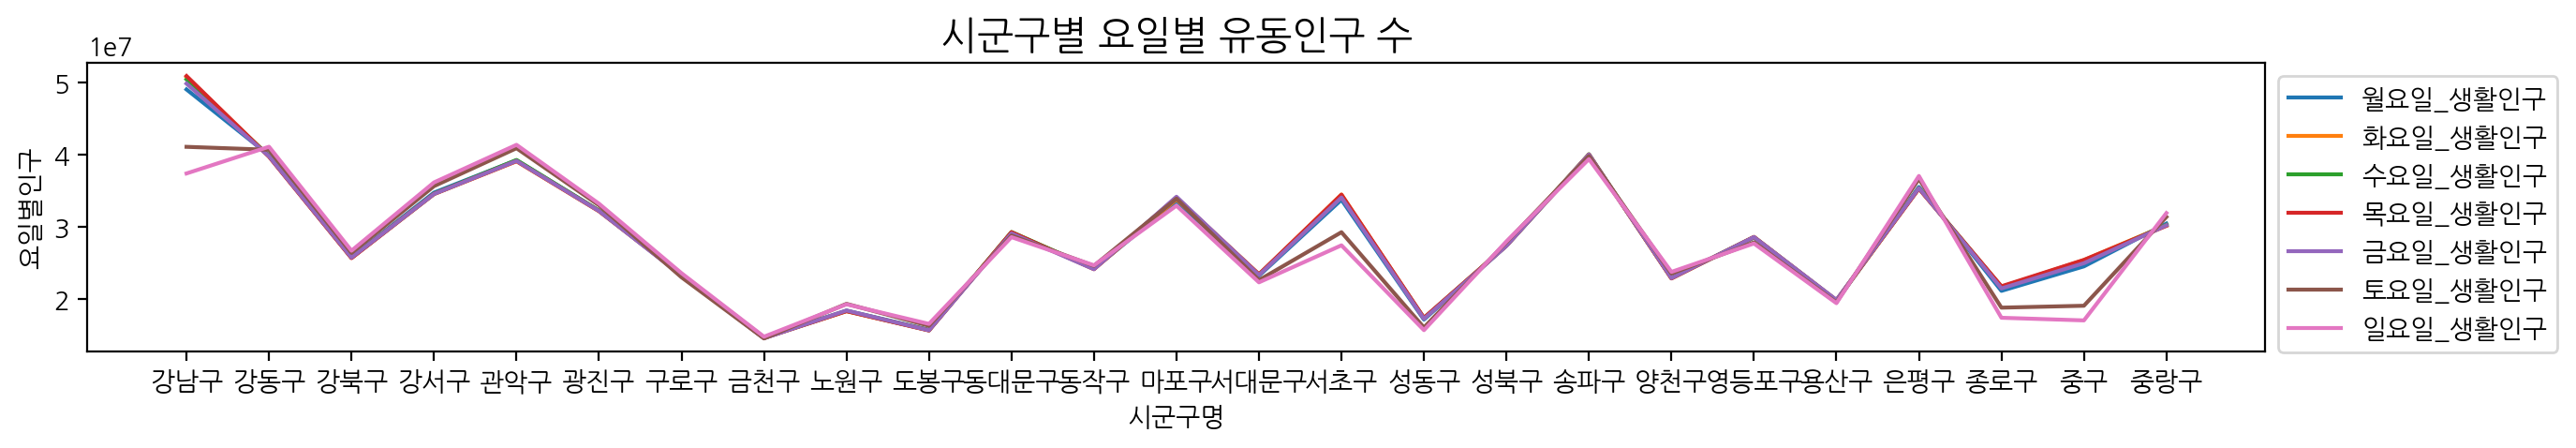

In [95]:
plt.figure(figsize=(15,2))
sns.lineplot(data=df_week, x="시군구명", y="요일별인구", hue="요일별", estimator=sum, ci=None)
plt.title("시군구별 요일별 유동인구 수", fontsize=15)
plt.legend(bbox_to_anchor=(1,1))

## 요일별 유동인구

Text(0.5, 1.0, '요일별 유동인구 수')

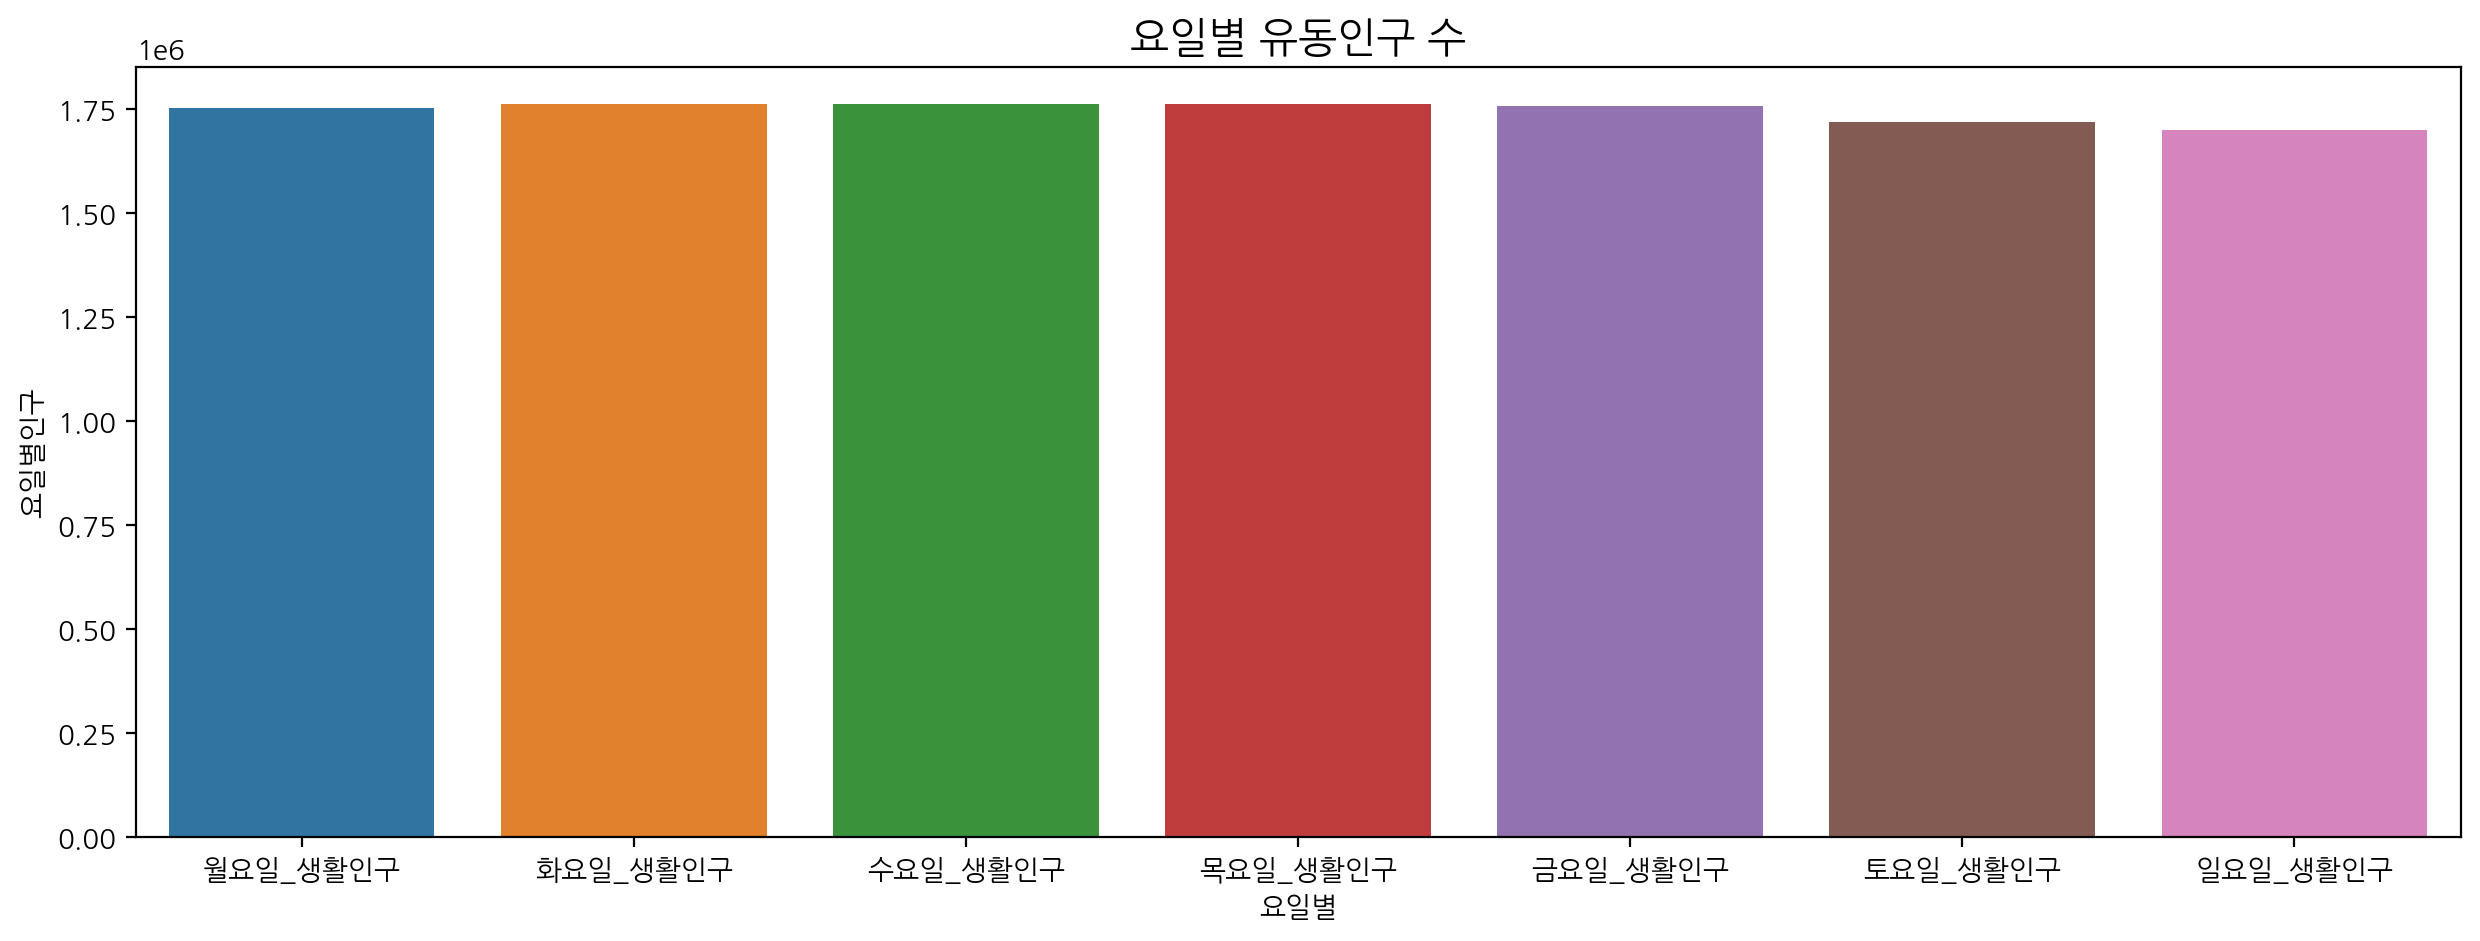

In [96]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_week, x="요일별", y="요일별인구", ci=None)
plt.title("요일별 유동인구 수", fontsize=15)

# 상관관계

## 매출 데이터셋

In [97]:
maechul_columns = maechul.columns
drop_columns = [col for col in maechul_columns if "비율" in col]

In [98]:
maechul = maechul.drop(columns=drop_columns, axis=1)

In [99]:
maechul = maechul.drop(columns=["주중_매출_금액","주말_매출_금액",'주중_매출_건수', '주말_매출_건수'],axis=1)

In [100]:
df_code_mini = df_code[["상권_코드","행정동_코드","행정동명","시군구명"]]

In [101]:
maechul_m = maechul.merge(df_code_mini, on="상권_코드", how="left")
maechul_m.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,행정동_코드,행정동명,시군구명
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391,25502,...,108,1098,2013,4344,7792,7568,28,11110560,평창동,종로구
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,122957138,12039,...,52,926,1222,2698,3404,2670,9,11110560,평창동,종로구


In [102]:
maechul_m = maechul_m[["시군구명","행정동명","분기당_매출_금액","점포수"]]
maechul_m = maechul_m.groupby(["시군구명","행정동명"]).sum()
maechul_m.reset_index()

,시군구명,행정동명,분기당_매출_금액,점포수
0,강남구,개포1동,7392885,9
1,강남구,개포2동,101172867848,3526
2,강남구,개포4동,122071403738,2019
3,강남구,논현1동,1435833997837,22093
4,강남구,논현2동,518011005206,11567
...,...,...,...,...
396,중랑구,상봉2동,280294948942,6611
397,중랑구,신내1동,94679741672,3762
398,중랑구,신내2동,31058091900,969
399,중랑구,중화1동,44189026709,1861


In [106]:
df_heat = pd.merge(maechul_m, move_pop_m, on='행정동명', how='left')
df_heat.head(2)

,행정동명,분기당_매출_금액,점포수,기준_년코드,시군구명,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,...,17~21시_생활인구,21~24시_생활인구,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드
0,개포1동,7392885,9,2021,강남구,8443972,137388,64092,73298,26412,...,20040,17631,20395,19157,19288,19856,19667,20154,18868,46722640
1,개포2동,101172867848,3526,2021,강남구,16965216,2726991,1290584,1436407,551533,...,443625,296194,391782,396697,396070,398946,394407,384518,364572,93445360


In [107]:
df_heat = df_heat.groupby(["시군구명","행정동명"]).sum()
df_heat.reset_index()

,시군구명,행정동명,분기당_매출_금액,점포수,기준_년코드,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,...,17~21시_생활인구,21~24시_생활인구,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드
0,강남구,개포1동,7392885,9,2021,8443972,137388,64092,73298,26412,...,20040,17631,20395,19157,19288,19856,19667,20154,18868,46722640
1,강남구,개포2동,101172867848,3526,2021,16965216,2726991,1290584,1436407,551533,...,443625,296194,391782,396697,396070,398946,394407,384518,364572,93445360
2,강남구,개포4동,122071403738,2019,2021,42219620,10293594,4953065,5340528,1789097,...,1439635,1251963,1494022,1504298,1495876,1489270,1484649,1409824,1415648,233613800
3,강남구,논현1동,1435833997837,22093,2021,67738704,44557563,21989188,22568379,2989242,...,8125270,4743298,6612762,6788867,6742462,6791911,6712872,5716620,5192076,373776672
4,강남구,논현2동,518011005206,11567,2021,76182880,34162556,17099361,17063189,3050743,...,6174137,3368535,5161328,5399143,5351511,5425494,5248908,3977904,3598274,420499116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,중랑구,상봉2동,280294948942,6611,2021,42323756,22590916,10492678,12098240,1926498,...,3972968,2928572,3190114,3166479,3182819,3174939,3198470,3376407,3301681,225211800
397,중랑구,신내1동,94679741672,3762,2021,42284832,7847030,3577835,4269190,1409943,...,1500523,999638,1103630,1095502,1101682,1093183,1109001,1156890,1187147,225213600
398,중랑구,신내2동,31058091900,969,2021,8520452,226566,101035,125533,43645,...,45644,28652,32458,32415,32728,32382,32537,32297,31750,45042760
399,중랑구,중화1동,44189026709,1861,2021,16882000,10808859,5023805,5785053,1938356,...,1689381,1441947,1547803,1542703,1540197,1533794,1538816,1532594,1572949,90084800


In [108]:
corr = df_heat.corr()
mask = np.triu(np.ones_like(corr))

In [109]:
corr = df_heat.corr()
corr

,분기당_매출_금액,점포수,기준_년코드,상권_코드,총_생활인구_수,남성_생활인구,여성_생활인구,10대_생활인구,20대_생활인구,30대_생활인구,...,17~21시_생활인구,21~24시_생활인구,월요일_생활인구,화요일_생활인구,수요일_생활인구,목요일_생활인구,금요일_생활인구,토요일_생활인구,일요일_생활인구,행정동_코드
분기당_매출_금액,1.000000,0.749689,0.151559,0.459615,0.408021,0.440537,0.375413,0.209376,0.416798,0.476311,...,0.448101,0.291683,0.426070,0.438359,0.436342,0.439841,0.435181,0.352371,0.304441,0.466987
점포수,0.749689,1.000000,0.181039,0.573573,0.628491,0.654588,0.600258,0.385892,0.638159,0.688333,...,0.675325,0.510567,0.645268,0.657783,0.656694,0.659789,0.656556,0.572134,0.519152,0.582694
기준_년코드,0.151559,0.181039,1.000000,0.189903,0.185073,0.180915,0.187618,0.125949,0.202959,0.203837,...,0.199313,0.168796,0.184281,0.186880,0.186073,0.186724,0.189359,0.183762,0.170666,0.194864
상권_코드,0.459615,0.573573,0.189903,1.000000,0.640638,0.651116,0.626643,0.457910,0.594506,0.620615,...,0.645299,0.580026,0.645845,0.650343,0.650116,0.651059,0.650045,0.616622,0.592958,0.999294
총_생활인구_수,0.408021,0.628491,0.185073,0.640638,1.000000,0.996104,0.996725,0.867625,0.891876,0.950581,...,0.988653,0.978594,0.998872,0.997378,0.997932,0.997369,0.998440,0.991118,0.980482,0.646472
남성_생활인구,0.440537,0.654588,0.180915,0.651116,0.996104,1.000000,0.985710,0.841250,0.892914,0.960309,...,0.985249,0.965106,0.997764,0.997535,0.997630,0.997444,0.997246,0.979634,0.966285,0.657387
여성_생활인구,0.375413,0.600258,0.187618,0.626643,0.996725,0.985710,1.000000,0.885867,0.884818,0.935152,...,0.985005,0.984260,0.993048,0.990405,0.991375,0.990472,0.992699,0.994862,0.986786,0.632036
10대_생활인구,0.209376,0.385892,0.125949,0.457910,0.867625,0.841250,0.885867,1.000000,0.662836,0.728389,...,0.842801,0.893389,0.857301,0.849627,0.851098,0.848950,0.852870,0.887842,0.896237,0.463851
20대_생활인구,0.416798,0.638159,0.202959,0.594506,0.891876,0.892914,0.884818,0.662836,1.000000,0.897114,...,0.914677,0.853765,0.889621,0.891459,0.893426,0.893428,0.895339,0.883712,0.861040,0.598482
30대_생활인구,0.476311,0.688333,0.203837,0.620615,0.950581,0.960309,0.935152,0.728389,0.897114,1.000000,...,0.952752,0.891739,0.957909,0.962392,0.961782,0.963059,0.960601,0.916500,0.891853,0.629480


In [110]:
# 23/04/15 추가
print("Find most important features")
corr = df_heat.corr()
corr.sort_values(["분기당_매출_금액"], ascending = False, inplace = True)
print(corr.분기당_매출_금액)

Find most important features
분기당_매출_금액      1.000000
점포수            0.749689
14~17시_생활인구    0.542424
11~14시_생활인구    0.540721
30대_생활인구       0.476311
행정동_코드         0.466987
40대_생활인구       0.463875
상권_코드          0.459615
17~21시_생활인구    0.448101
남성_생활인구        0.440537
목요일_생활인구       0.439841
화요일_생활인구       0.438359
수요일_생활인구       0.436342
금요일_생활인구       0.435181
월요일_생활인구       0.426070
20대_생활인구       0.416798
06~11시_생활인구    0.409910
총_생활인구_수       0.408021
50대_생활인구       0.382634
여성_생활인구        0.375413
토요일_생활인구       0.352371
일요일_생활인구       0.304441
21~24시_생활인구    0.291683
60대이상_생활인구     0.277156
00~06시_생활인구    0.232834
10대_생활인구       0.209376
기준_년코드         0.151559
Name: 분기당_매출_금액, dtype: float64


Text(0.5, 1.0, '매출과 유동인구 데이터셋 상관계수')

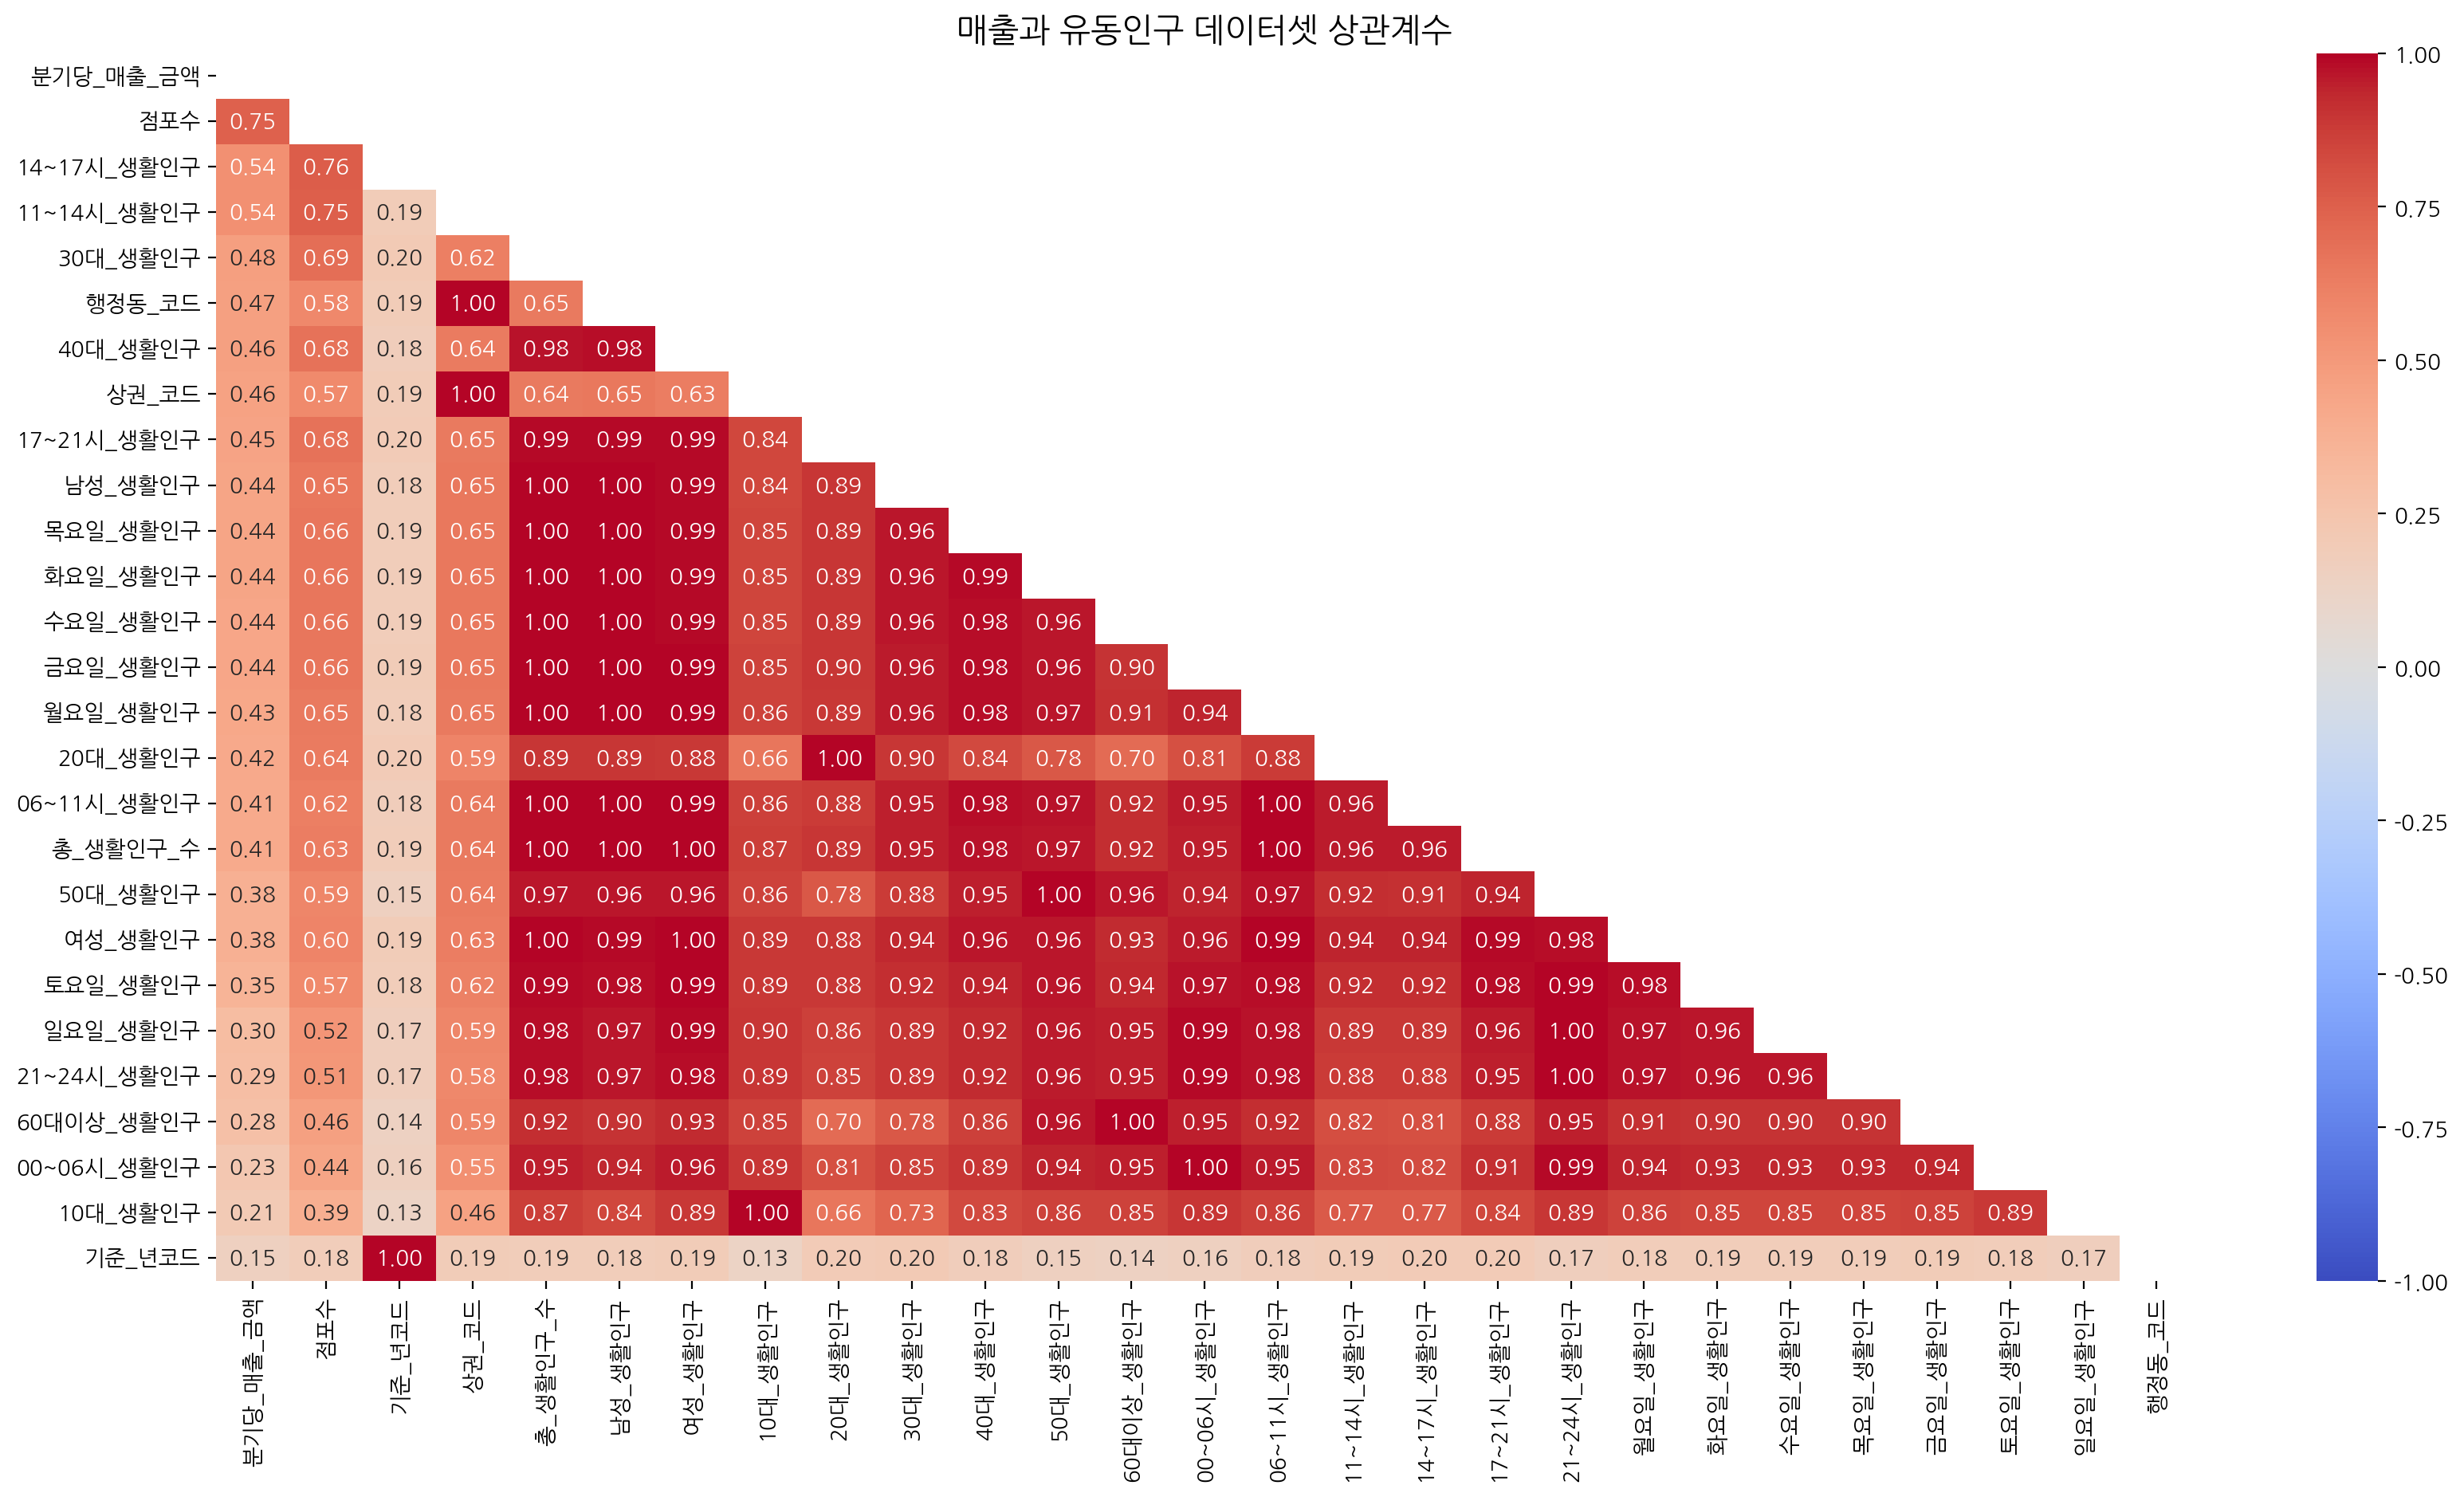

In [111]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="coolwarm", annot =True, fmt=".2f", vmin=-1,vmax=1,mask=mask)
plt.title("매출과 유동인구 데이터셋 상관계수", fontsize=15)

In [114]:
top_corr_features = corr.index[abs(corr["분기당_매출_금액"])>0.5]
corrmat = df_heat[top_corr_features].corr()
mask = np.triu(np.ones_like(corrmat))

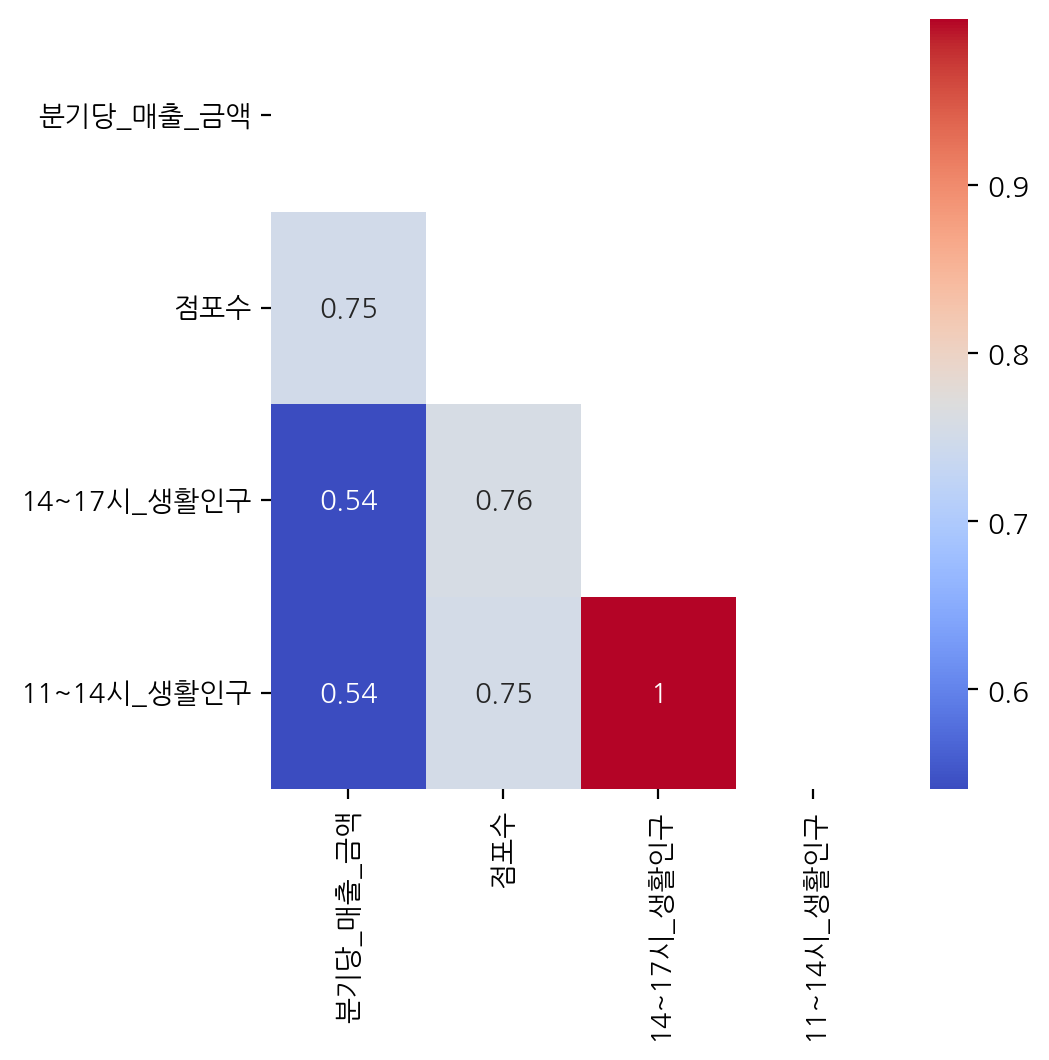

In [116]:
plt.figure(figsize=(5,5))
g = sns.heatmap(df_heat[top_corr_features].corr(),annot=True,cmap="coolwarm", mask=mask)

# 매출 데이터셋 시각화

In [118]:
maechul = pd.read_csv('서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv', encoding="cp949")

In [119]:
maechul = maechul.drop(columns=['분기당_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],axis=1)

In [121]:
maechul.columns = ['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '월요일',
       '화요일', '수요일', '목요일', '금요일', '토요일',
       '일요일', '00~06시', '06~11시', '11~14시',
       '14~17시', '17~21시', '21~24시', '남성',
       '여성', '10대', '20대', '30대',
       '40대', '50대', '60대_이상', '점포수']

In [123]:
df_code = pd.read_csv('db431fa9896e1e12.csv',encoding="utf-8")

In [124]:
df_code = df_code.drop_duplicates()
df_code.tail()

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,행정동코드,행정동명,시군구명
129540,202112,U,관광특구,1001493,동대문패션타운 관광특구,200974,451975,11140,11140590,11140590,광희동,중구
129880,202112,U,관광특구,1001494,종로?청계 관광특구,199768,452273,11110,11110615,11110615,종로1.2.3.4가동,종로구
130866,202112,U,관광특구,1001495,잠실 관광특구,210191,446339,11710,11710566,11710566,오륜동,송파구
130900,202112,U,관광특구,1001496,강남 마이스 관광특구,205310,445727,11680,11680580,11680580,삼성1동,강남구
130934,202112,U,관광특구,1001491,이태원 관광특구,199503,448326,11170,11170650,11170650,이태원1동,용산구


In [125]:
df_code = df_code[["상권_코드","행정동_코드","행정동명","시군구명"]]
df_code

,상권_코드,행정동_코드,행정동명,시군구명
0,2110753,11545710,시흥5동,금천구
34,2110427,11350611,하계1동,노원구
68,2110755,11545680,시흥2동,금천구
102,2110739,11545690,시흥3동,금천구
136,2111017,11710562,방이2동,송파구
...,...,...,...,...
129540,1001493,11140590,광희동,중구
129880,1001494,11110615,종로1.2.3.4가동,종로구
130866,1001495,11710566,오륜동,송파구
130900,1001496,11680580,삼성1동,강남구


In [127]:
maechul_m = pd.merge(maechul, df_code, on=['상권_코드'], how='left')
maechul_m.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,월요일,...,10대,20대,30대,40대,50대,60대_이상,점포수,행정동_코드,행정동명,시군구명
140825,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,997157377,223344287,...,912095,76937405,233213516,262016189,113412321,79245081,5,11680580,삼성1동,강남구
140826,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,11911789492,1472780295,...,0,4707327,1073648650,2370848619,3552799560,4909785336,6,11680580,삼성1동,강남구
140827,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,1717076948,214008061,...,16795861,290757468,348920397,318762634,251461642,296720655,8,11680580,삼성1동,강남구
140828,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,12566919,0,...,0,0,0,0,12566919,0,4,11680580,삼성1동,강남구
140829,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,10000000,0,...,0,137299,6562539,1366053,1934109,0,8,11680580,삼성1동,강남구


In [128]:
maechul_m = maechul_m.drop_duplicates()
maechul_m.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,월요일,...,10대,20대,30대,40대,50대,60대_이상,점포수,행정동_코드,행정동명,시군구명
140825,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,997157377,223344287,...,912095,76937405,233213516,262016189,113412321,79245081,5,11680580,삼성1동,강남구
140826,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,11911789492,1472780295,...,0,4707327,1073648650,2370848619,3552799560,4909785336,6,11680580,삼성1동,강남구
140827,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,1717076948,214008061,...,16795861,290757468,348920397,318762634,251461642,296720655,8,11680580,삼성1동,강남구
140828,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,12566919,0,...,0,0,0,0,12566919,0,4,11680580,삼성1동,강남구
140829,2021,4,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,10000000,0,...,0,137299,6562539,1366053,1934109,0,8,11680580,삼성1동,강남구


In [129]:
maechul_m = maechul_m.groupby(["시군구명","행정동명"]).sum()
maechul_m = maechul_m.reset_index()

In [131]:
maechul_m_week = pd.melt(maechul_m, id_vars=["시군구명", '행정동명', '분기당_매출_금액'], 
                         value_vars=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'], 
                         var_name="요일별", value_name="요일별매출")
maechul_m_week

,시군구명,행정동명,분기당_매출_금액,요일별,요일별매출
0,강남구,개포1동,7392885,월요일,387352
1,강남구,개포2동,101172867848,월요일,14972126049
2,강남구,개포4동,122071403738,월요일,22049732082
3,강남구,논현1동,1435833997837,월요일,216234240176
4,강남구,논현2동,518011005206,월요일,73177010567
...,...,...,...,...,...
2802,중랑구,상봉2동,280294948942,일요일,35459754873
2803,중랑구,신내1동,94679741672,일요일,9695066179
2804,중랑구,신내2동,31058091900,일요일,2461002717
2805,중랑구,중화1동,44189026709,일요일,3626559763


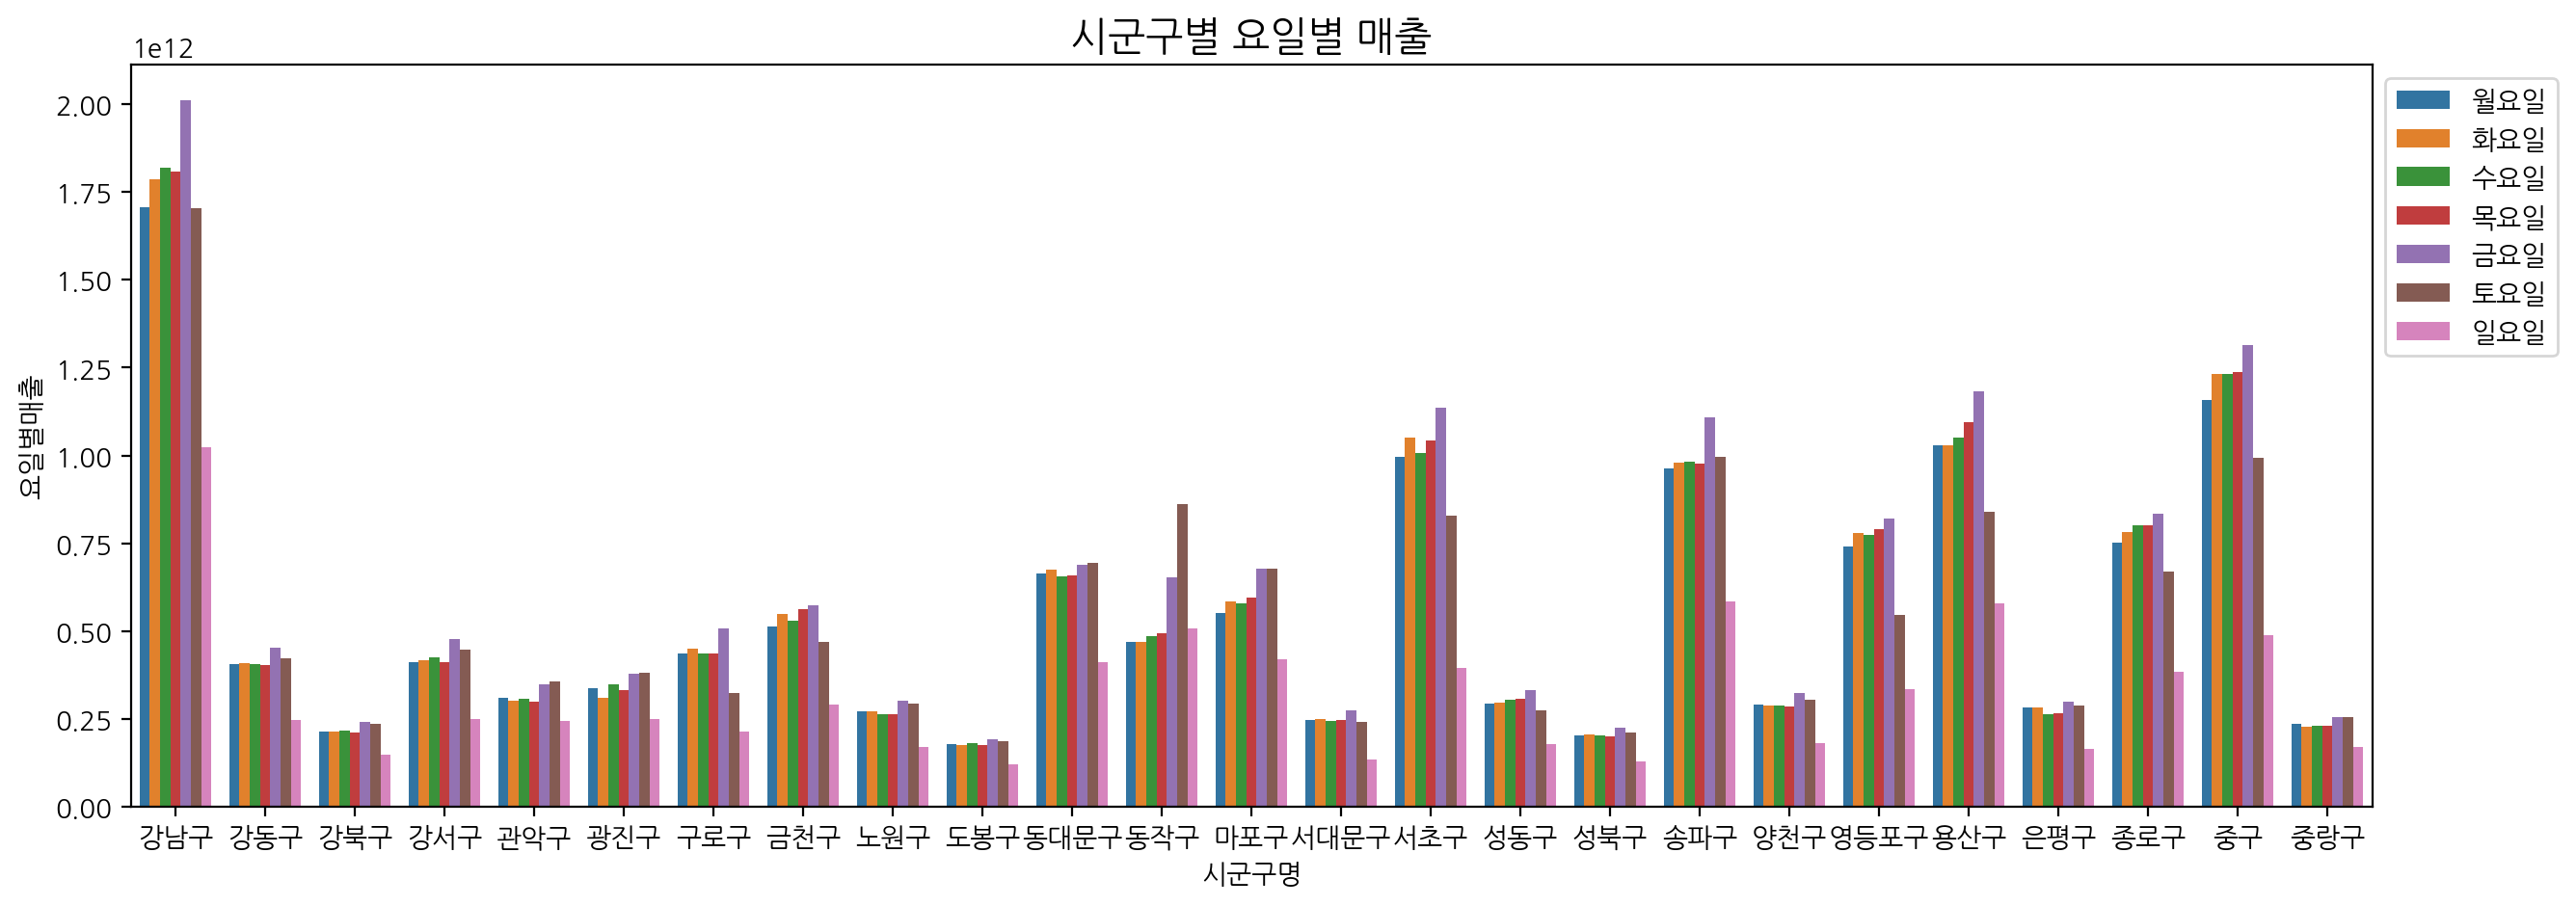

In [132]:
plt.figure(figsize=(15,5))
sns.barplot(data=maechul_m_week, x="시군구명", y="요일별매출", hue="요일별", estimator=sum, ci=None)
plt.title("시군구별 요일별 매출", fontsize=15)
plt.legend(bbox_to_anchor=(1,1))

In [135]:
maechul_m_time = pd.melt(maechul_m, id_vars=["시군구명", '행정동명', '분기당_매출_금액'], 
                         value_vars=['00~06시', '06~11시', '11~14시', '14~17시', '17~21시', '21~24시'], 
                         var_name="시간대별", value_name="시간대별매출")
maechul_m_time

,시군구명,행정동명,분기당_매출_금액,시간대별,시간대별매출
0,강남구,개포1동,7392885,00~06시,0
1,강남구,개포2동,101172867848,00~06시,378447282
2,강남구,개포4동,122071403738,00~06시,1411731892
3,강남구,논현1동,1435833997837,00~06시,22273640610
4,강남구,논현2동,518011005206,00~06시,7411108989
...,...,...,...,...,...
2401,중랑구,상봉2동,280294948942,21~24시,28757284442
2402,중랑구,신내1동,94679741672,21~24시,6374563841
2403,중랑구,신내2동,31058091900,21~24시,2004876843
2404,중랑구,중화1동,44189026709,21~24시,3155004772


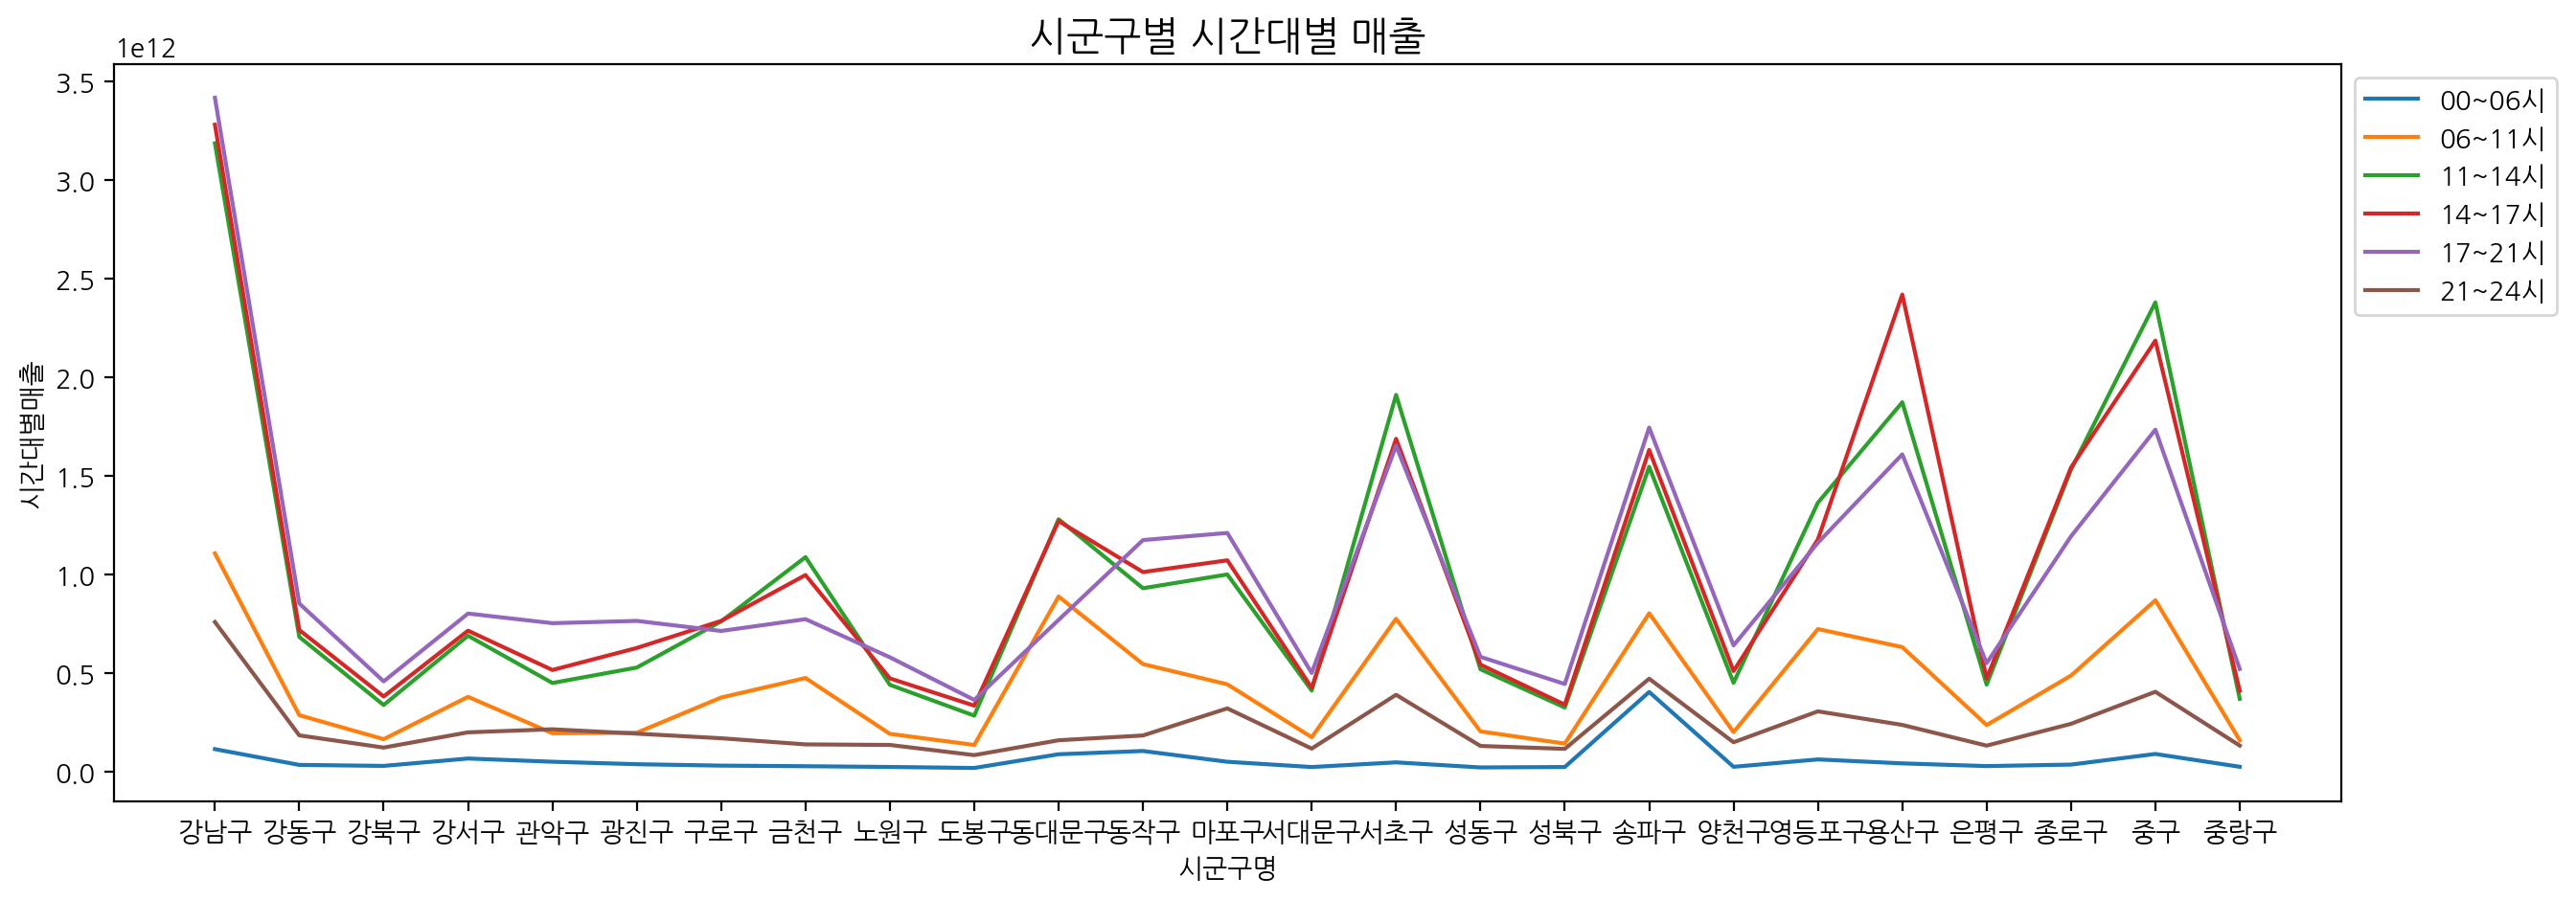

In [136]:
plt.figure(figsize=(15,5))
sns.lineplot(data=maechul_m_time, x="시군구명", y="시간대별매출", hue="시간대별", estimator=sum, ci=None)
plt.title("시군구별 시간대별 매출", fontsize=15)
plt.legend(bbox_to_anchor=(1,1))

Text(0.5, 1.0, '시간대별 매출')

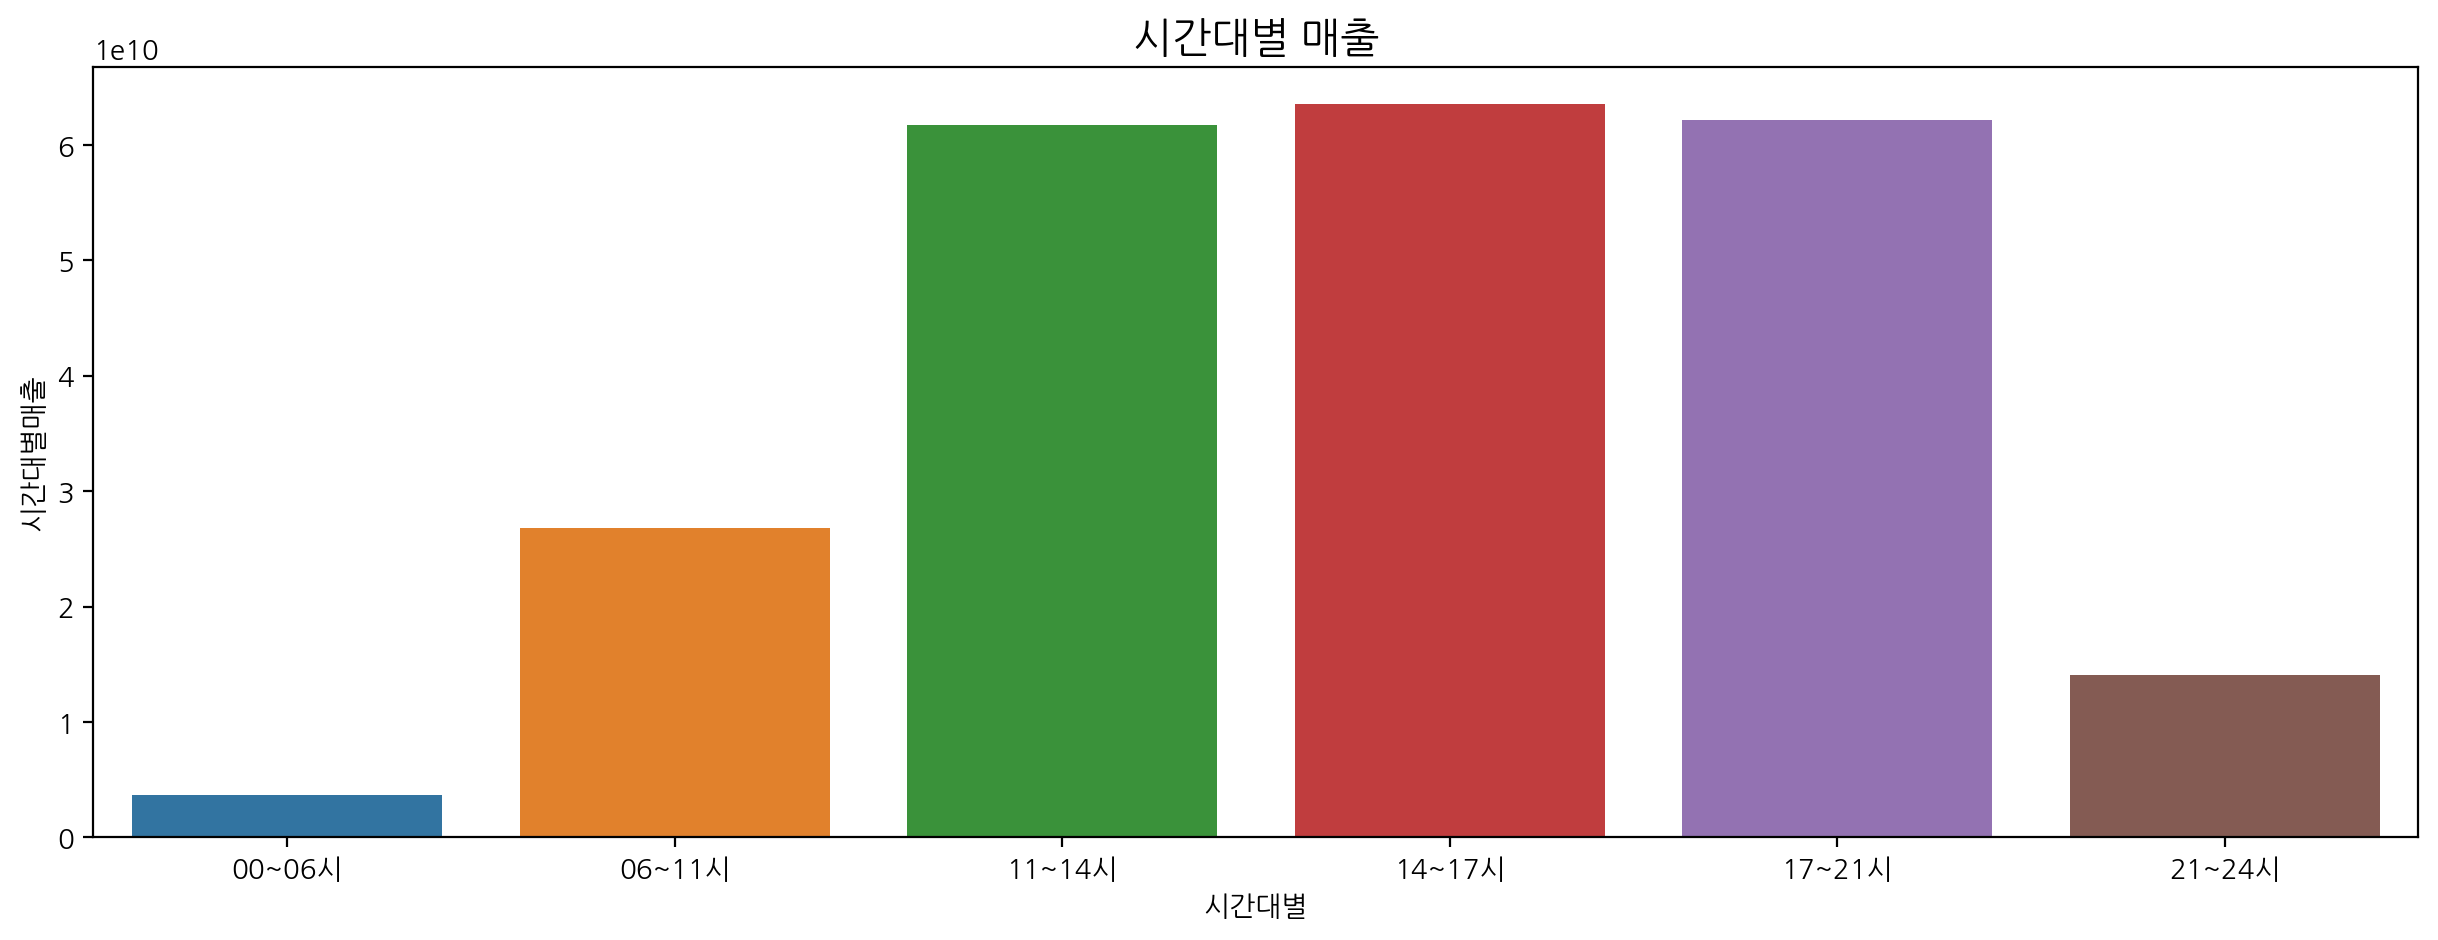

In [137]:
plt.figure(figsize=(15,5))
sns.barplot(data=maechul_m_time, x="시간대별", y="시간대별매출", ci=None)
plt.title("시간대별 매출", fontsize=15)

In [138]:
maechul_m_age = pd.melt(maechul_m, id_vars=["시군구명", '행정동명', '분기당_매출_금액'], 
                        value_vars=['10대', '20대', '30대', '40대', '50대', '60대_이상'], 
                        var_name="연령별", value_name="연령별매출")
maechul_m_age

,시군구명,행정동명,분기당_매출_금액,연령별,연령별매출
0,강남구,개포1동,7392885,10대,0
1,강남구,개포2동,101172867848,10대,1044272792
2,강남구,개포4동,122071403738,10대,502169341
3,강남구,논현1동,1435833997837,10대,4603679764
4,강남구,논현2동,518011005206,10대,2037007412
...,...,...,...,...,...
2401,중랑구,상봉2동,280294948942,60대_이상,44537854387
2402,중랑구,신내1동,94679741672,60대_이상,18785004106
2403,중랑구,신내2동,31058091900,60대_이상,3960892808
2404,중랑구,중화1동,44189026709,60대_이상,10824724100


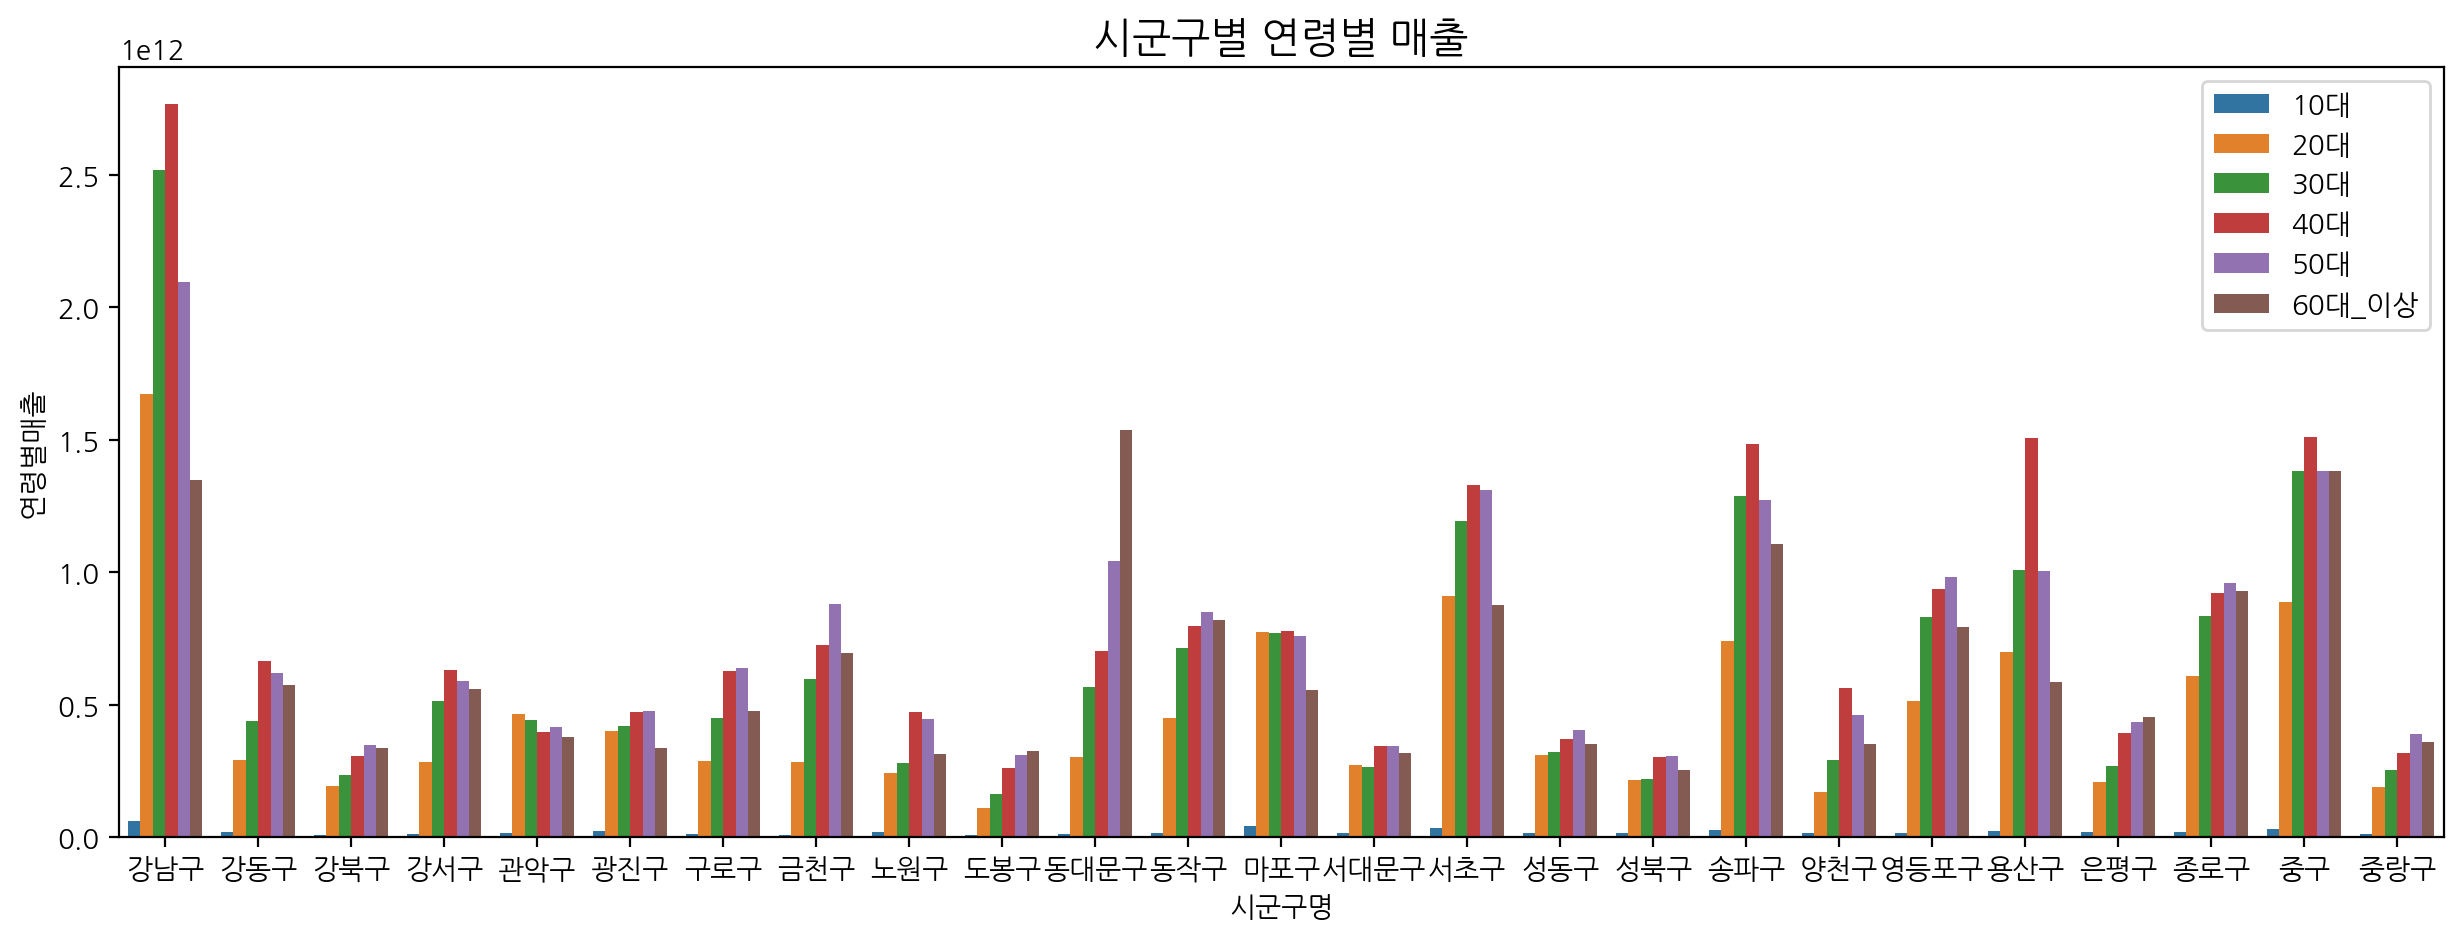

In [139]:
plt.figure(figsize=(15,5))
sns.barplot(data=maechul_m_age, x="시군구명", y="연령별매출", hue="연령별", estimator=sum, ci=None)
plt.title("시군구별 연령별 매출", fontsize=15)
plt.legend(bbox_to_anchor=(1,1))

Text(0.5, 1.0, '연령별 매출')

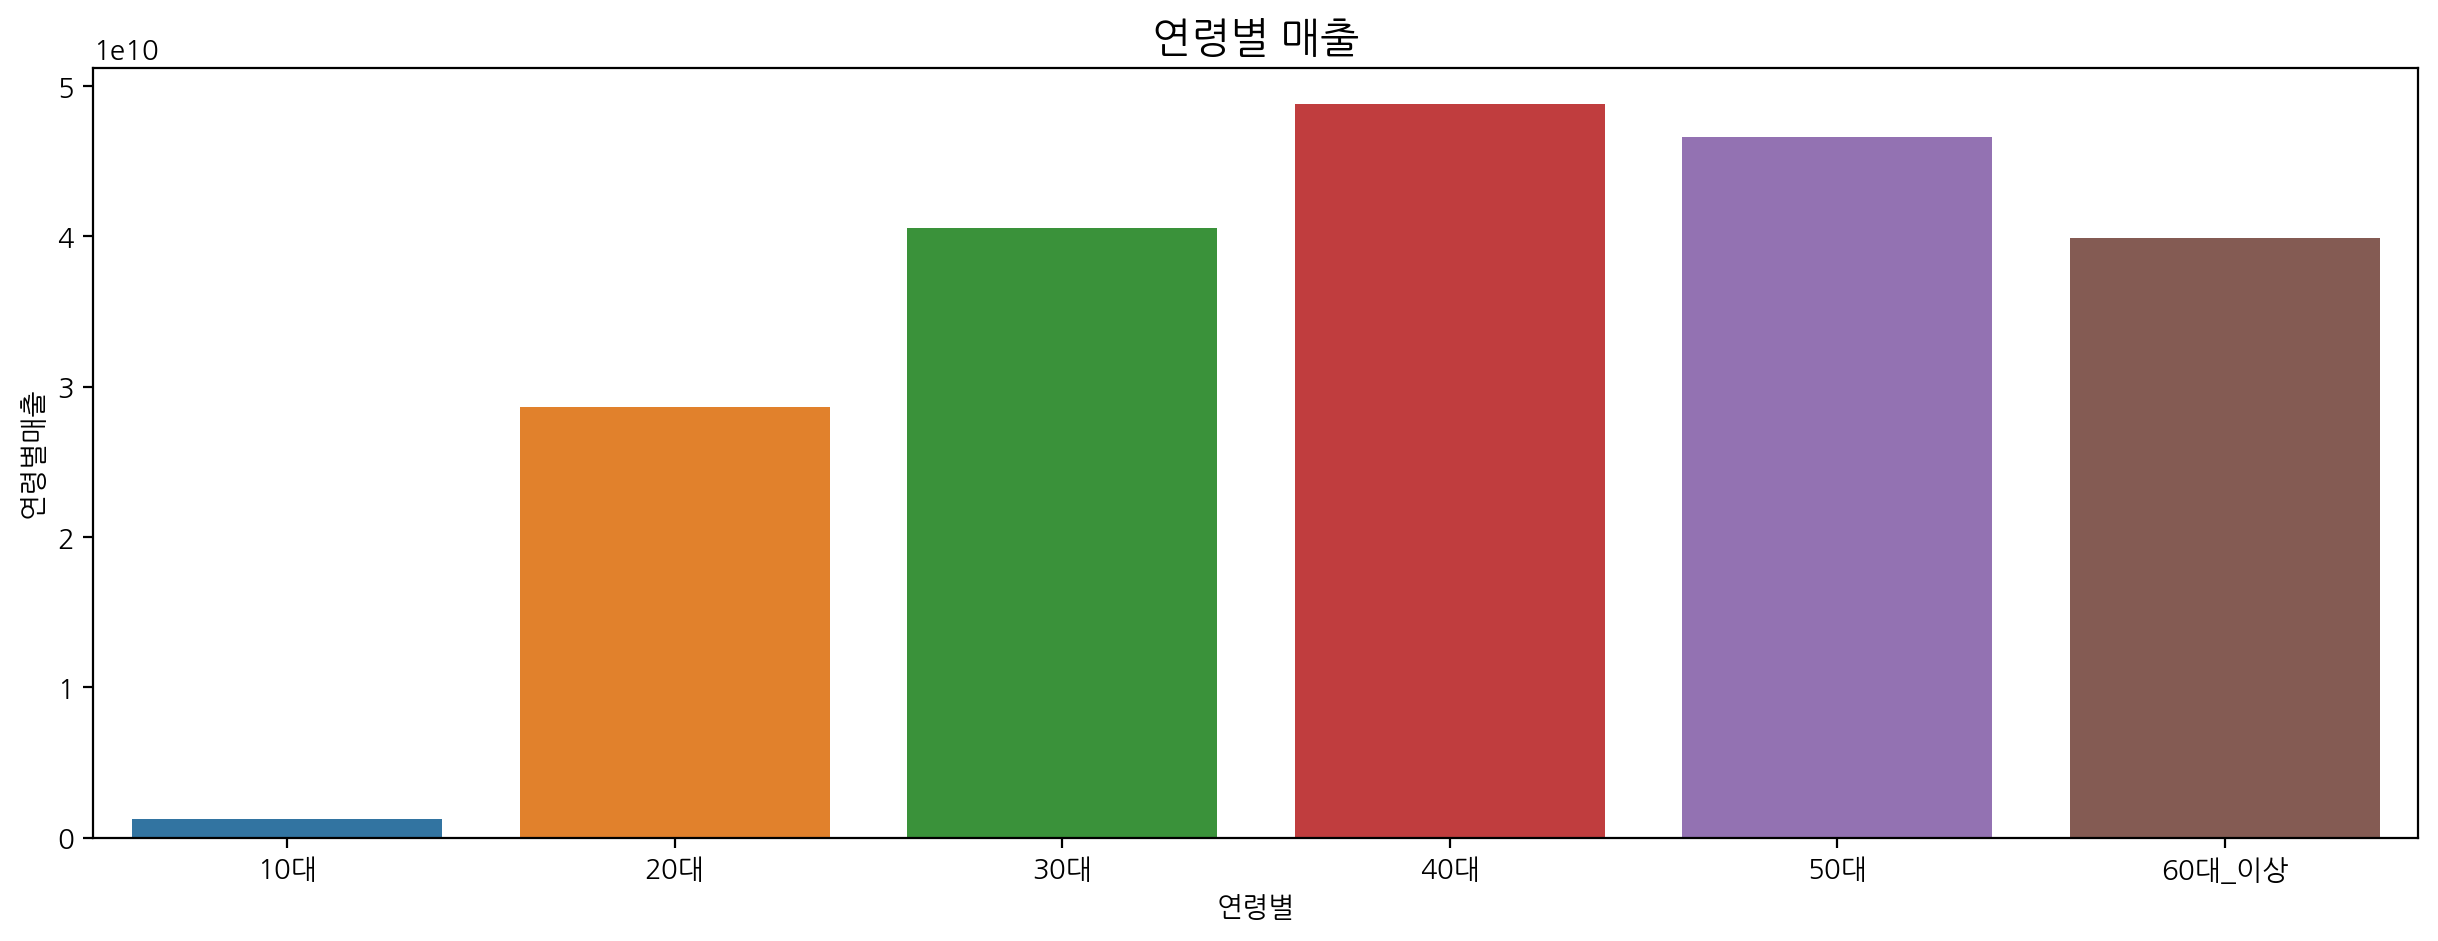

In [140]:
plt.figure(figsize=(15,5))
sns.barplot(data=maechul_m_age, x="연령별", y="연령별매출", ci=None)
plt.title("연령별 매출", fontsize=15)

In [141]:
maechul_m_sex = pd.melt(maechul_m, id_vars=["시군구명", '행정동명', '분기당_매출_금액'], 
                        value_vars=['남성', '여성'], var_name="성별", value_name="성별별매출")
maechul_m_sex

,시군구명,행정동명,분기당_매출_금액,성별,성별별매출
0,강남구,개포1동,7392885,남성,2910673
1,강남구,개포2동,101172867848,남성,44153650864
2,강남구,개포4동,122071403738,남성,73277921512
3,강남구,논현1동,1435833997837,남성,646495386709
4,강남구,논현2동,518011005206,남성,226682976940
...,...,...,...,...,...
797,중랑구,상봉2동,280294948942,여성,129978947229
798,중랑구,신내1동,94679741672,여성,42108354032
799,중랑구,신내2동,31058091900,여성,14175374508
800,중랑구,중화1동,44189026709,여성,21656751453


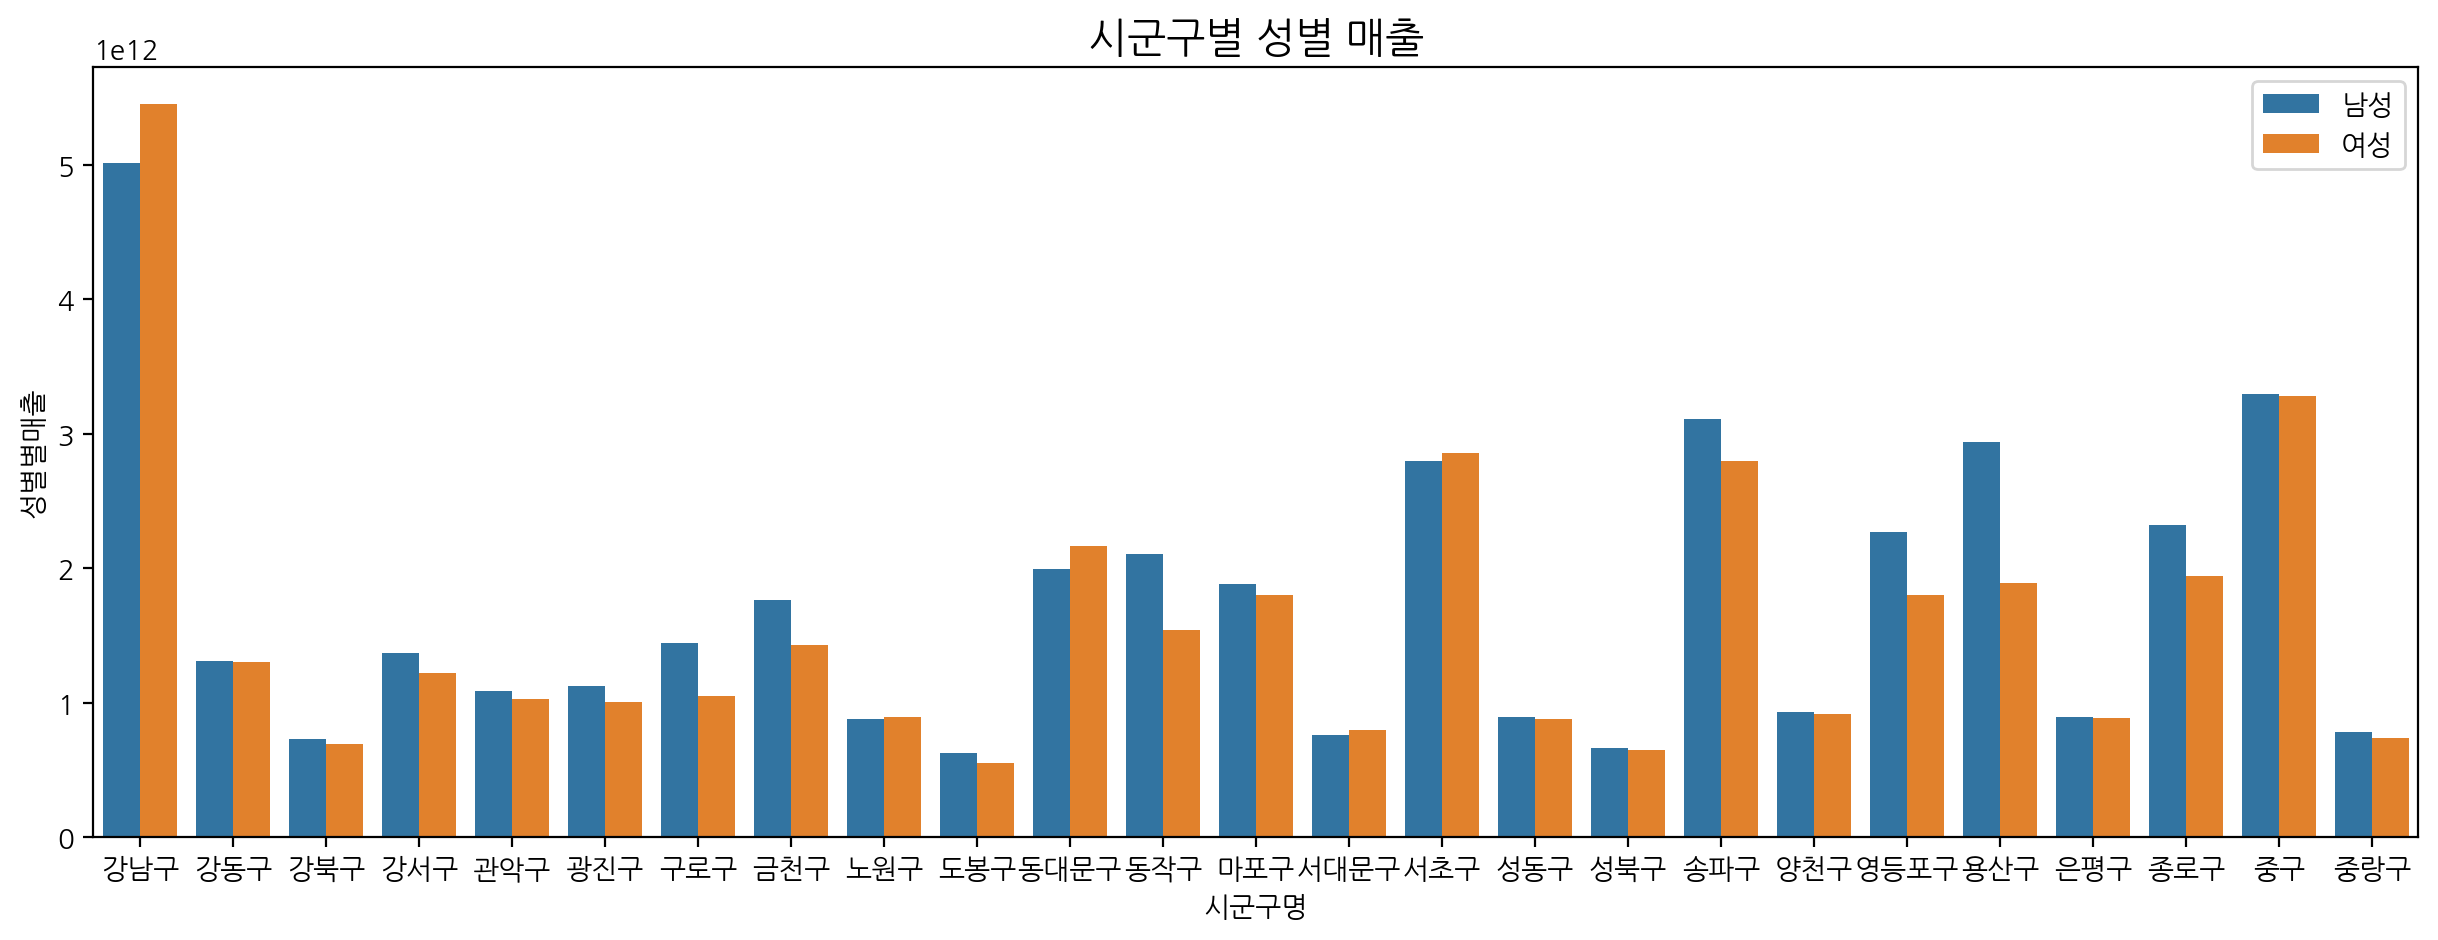

In [142]:
plt.figure(figsize=(15,5))
sns.barplot(data=maechul_m_sex, x="시군구명", y="성별별매출", hue="성별", estimator=sum, ci=None)
plt.title("시군구별 성별 매출", fontsize=15)
plt.legend(bbox_to_anchor=(1,1))

Text(0.5, 1.0, '시군구별 총 매출')

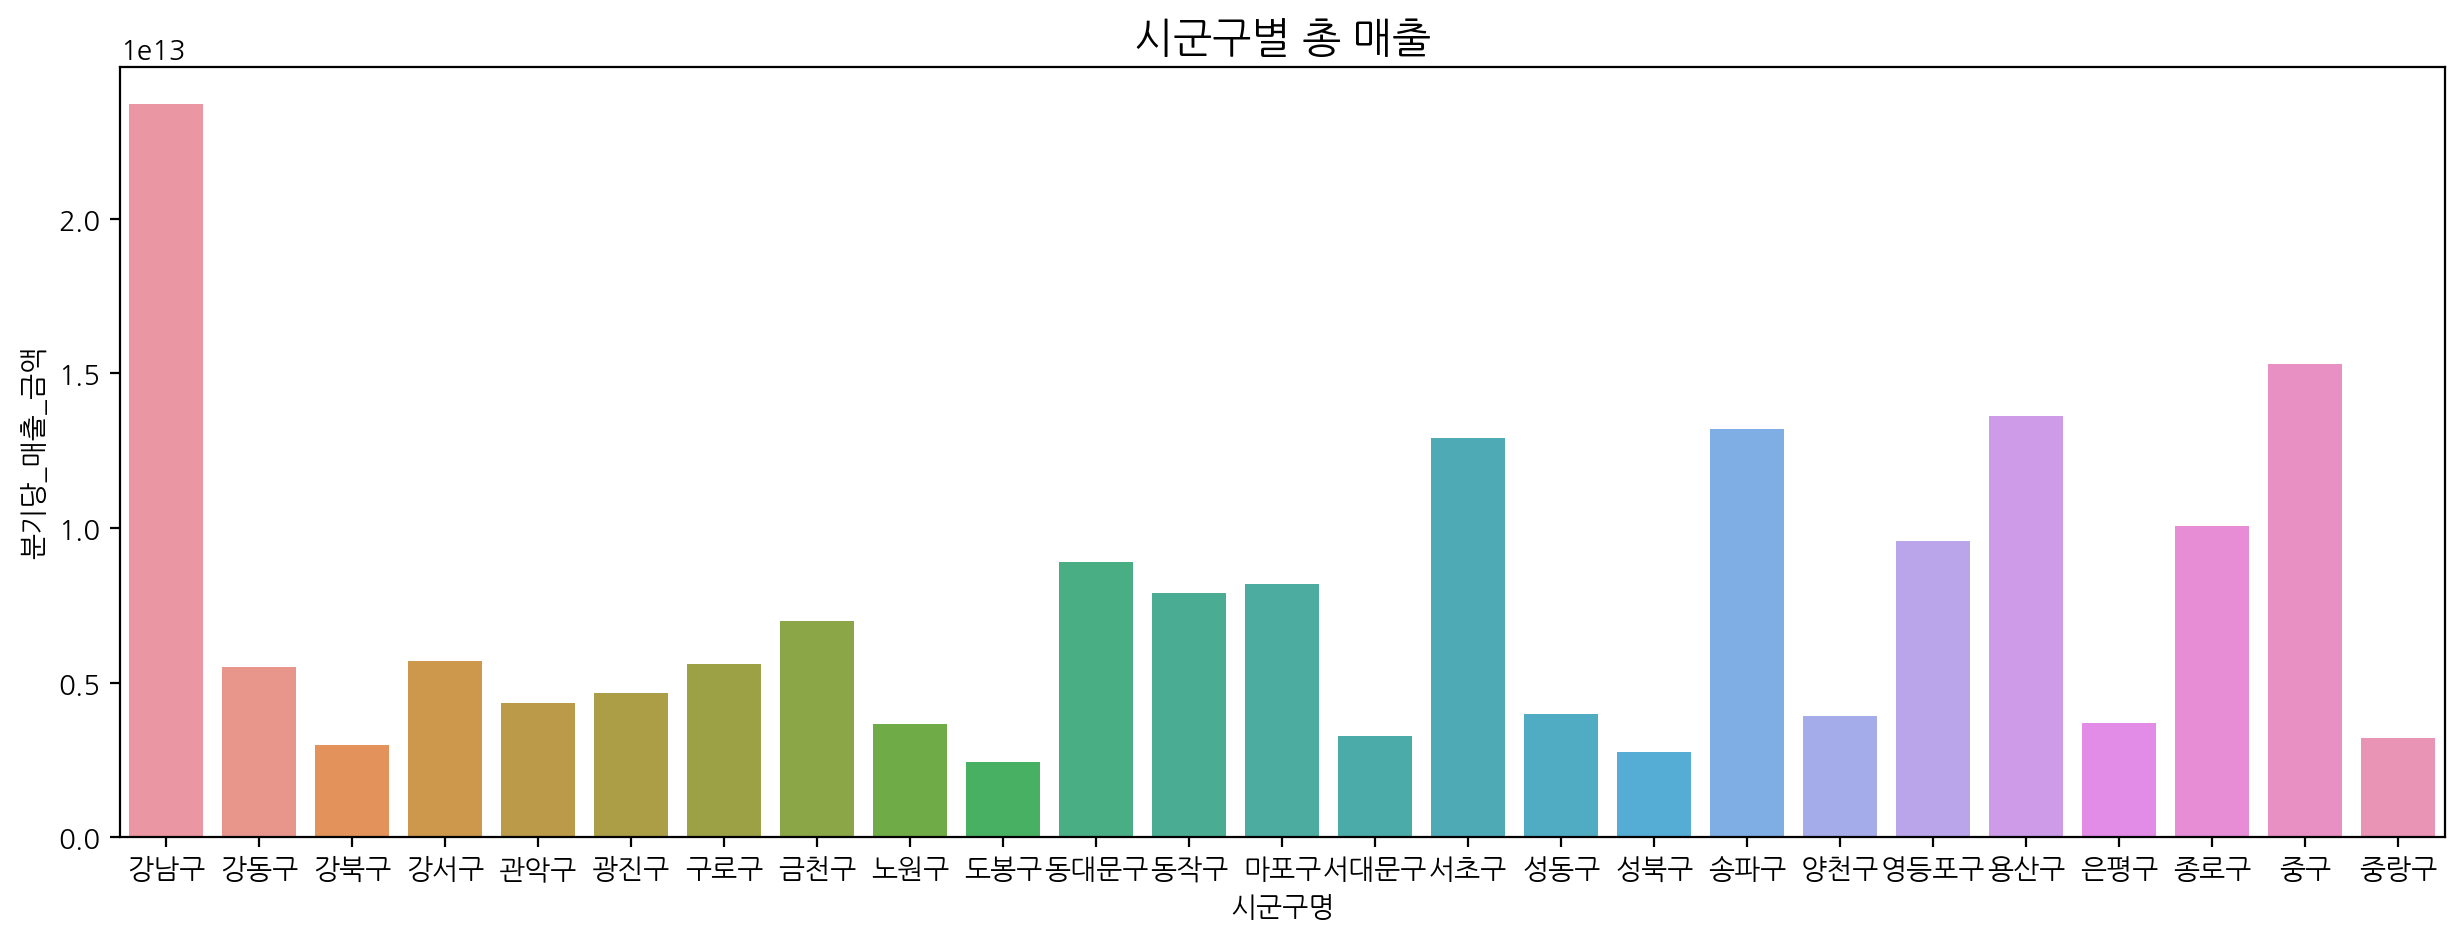

In [143]:
plt.figure(figsize=(15,5))
sns.barplot(data=maechul_m_sex, x="시군구명", y="분기당_매출_금액", estimator=sum, ci=None)
plt.title("시군구별 총 매출", fontsize=15)